In [322]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'TrainingData.csv'
df = pd.read_csv(Location)
df.head()

rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1      ...        \
0                          187.0                     0.3      ...         
1                          202.0                     0.5      ...         
2                          227.0                     0.5      ...         
3                          218.0                     0.2      ...         
4                          216.0                     0.2      ...         

   target_4_6006  target_4_8003  target_5_6006  target_7_57  target_8_57  \
0       1.748424            NaN            NaN     5.130631     1.341606   
1       2.144120            NaN            NaN     5.130631     1.195779   
2       1.932469            NaN            NaN     5.136395     1.409658   
3       2.088907            NaN            NaN     5.217102     1.477711   
4       2.604232            NaN            NaN     5.217102     1.458267   

   target_8_4002  target_8_6004  target_8_8003  target_9_4002  target_9_8003  
0       2.138792       3.013752            NaN       5.679280            NaN  
1       2.722099       3.888712            NaN       7.426751            NaN  
2       3.110970       3.888712            NaN       7.683732            NaN  
3       2.041574       3.208188            NaN       4.831243            NaN  
4       2.138792       3.499841            NaN       4.625658            NaN  

[5 rows x 95 columns]

In [5]:
len(df.chunkID.unique()) #there are 208 unique chunks of data

208

In [ ]:
#just to see what the data looks like to graph each chunk

In [325]:
''''''for i, group in df.groupby('chunkID'):
    group.plot(x='position_within_chunk', y='target_4_6006', title=str(i))'''

SyntaxError: invalid syntax (<ipython-input-325-bb3b185d1487>, line 1)

In [ ]:
# each chunk starts at different time, can't see time of day or day of week effects

In [ ]:
# to see time of day or day of week effects, need to graph them on same time scale. have to put the data on a 
#normalized time scale.

In [28]:
type('chunkID')

str

In [1]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'TrainingData.csv'
df = pd.read_csv(Location)
df.head()

dow = {'Sunday': 0,
             'Monday': 1,
             'Tuesday': 2,
             'Wednesday': 3,
             'Thursday': 4,
             'Friday': 5,
             'Saturday': 6}
df['dayofweek'] = df['weekday'].map(dow) # convert dayofweek to number
df['chunk_in_hour'] = df.dayofweek * 24 + df.hour  #create new column for hour within "normalized" time span, except from the second sunday onward.
df.head()

rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1      ...        \
0                          187.0                     0.3      ...         
1                          202.0                     0.5      ...         
2                          227.0                     0.5      ...         
3                          218.0                     0.2      ...         
4                          216.0                     0.2      ...         

   target_5_6006  target_7_57  target_8_57  target_8_4002  target_8_6004  \
0            NaN     5.130631     1.341606       2.138792       3.013752   
1            NaN     5.130631     1.195779       2.722099       3.888712   
2            NaN     5.136395     1.409658       3.110970       3.888712   
3            NaN     5.217102     1.477711       2.041574       3.208188   
4            NaN     5.217102     1.458267       2.138792       3.499841   

   target_8_8003  target_9_4002  target_9_8003  dayofweek  chunk_in_hour  
0            NaN       5.679280            NaN          6            165  
1            NaN       7.426751            NaN          6            166  
2            NaN       7.683732            NaN          6            167  
3            NaN       4.831243            NaN          0              0  
4            NaN       4.625658            NaN          0              1  

[5 rows x 97 columns]

In [9]:
df['zero_chunkhr'] = df.chunk_in_hour.map( lambda x: 1 if x == 0 else 0)
df['x'] = df.groupby('chunkID')['zero_chunkhr'].transform(sum)
df.head()

rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1 ...  target_8_57  \
0                          187.0                     0.3 ...     1.341606   
1                          202.0                     0.5 ...     1.195779   
2                          227.0                     0.5 ...     1.409658   
3                          218.0                     0.2 ...     1.477711   
4                          216.0                     0.2 ...     1.458267   

   target_8_4002  target_8_6004  target_8_8003  target_9_4002  target_9_8003  \
0       2.138792       3.013752            NaN       5.679280            NaN   
1       2.722099       3.888712            NaN       7.426751            NaN   
2       3.110970       3.888712            NaN       7.683732            NaN   
3       2.041574       3.208188            NaN       4.831243            NaN   
4       2.138792       3.499841            NaN       4.625658            NaN   

   dayofweek  chunk_in_hour  zero_chunkhr  x  
0          6            165             0  2  
1          6            166             0  2  
2          6            167             0  2  
3          0              0             1  2  
4          0              1             0  2  

[5 rows x 99 columns]

In [34]:
df2.head()

rowID  chunkID  position_within_chunk  month_most_common weekday  hour  \
3        4        1                      4                 10  Sunday     0   
286    359        2                     95                 10  Sunday     0   
386    555        3                     27                  6  Sunday     0   
798   1159        5                    103                  9  Sunday     0   
895   1328        6                      8                  7  Sunday     0   

     Solar.radiation_64  WindDirection..Resultant_1  \
3                  0.01                       219.0   
286                0.01                       288.0   
386                0.01                        77.0   
798                0.01                        81.0   
895                0.01                       240.0   

     WindDirection..Resultant_1018  WindSpeed..Resultant_1    ...     \
3                            218.0                     0.2    ...      
286                            NaN                     2.4    ...      
386                            NaN                     1.3    ...      
798                           81.0                     1.2    ...      
895                            NaN                     2.8    ...      

     target_7_57  target_8_57  target_8_4002  target_8_6004  target_8_8003  \
3       5.217102     1.477711       2.041574       3.208188            NaN   
286          NaN          NaN       0.777742       0.777742            NaN   
386          NaN     0.379149       0.583307       0.291653            NaN   
798     1.112597     1.079118       0.291653       0.486089            NaN   
895          NaN          NaN       0.291653       0.486089            NaN   

     target_9_4002  target_9_8003  dayofweek  chunk_in_hour  zero_pos  
3         4.831243            NaN          0              0         4  
286       2.929583            NaN          0              0        95  
386       1.002226            NaN          0              0        27  
798       0.411170            NaN          0              0       103  
895       0.282679            NaN          0              0         8  

[5 rows x 98 columns]

In [35]:
df3.head()

chunkID  zero_pos
3          1         4
286        2        95
386        3        27
798        5       103
895        6         8

In [38]:
df4.head()

rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1       ...        \
0                          187.0                     0.3       ...         
1                          202.0                     0.5       ...         
2                          227.0                     0.5       ...         
3                          218.0                     0.2       ...         
4                          216.0                     0.2       ...         

   target_8_4002  target_8_6004  target_8_8003  target_9_4002  target_9_8003  \
0       2.138792       3.013752            NaN       5.679280            NaN   
1       2.722099       3.888712            NaN       7.426751            NaN   
2       3.110970       3.888712            NaN       7.683732            NaN   
3       2.041574       3.208188            NaN       4.831243            NaN   
4       2.138792       3.499841            NaN       4.625658            NaN   

   dayofweek  chunk_in_hour  zero_pos  y  normlized_time  
0          6            165         4  0           165.0  
1          6            166         4  0           166.0  
2          6            167         4  0           167.0  
3          0              0         4  1           168.0  
4          0              1         4  1           169.0  

[5 rows x 100 columns]

In [ ]:
df2['zero_pos'] = df[df['chunk_in_hour']==0]['position_within_chunk']

In [2]:
df_filt = df[df['chunk_in_hour'] == 0]
df2 = df_filt.drop_duplicates(subset=['chunkID'],keep='first')
df2['zero_pos'] = df2['position_within_chunk']
df3 = df2[['chunkID','zero_pos']]
df3
df4 = df.merge(df3)
df4['y'] = (df4['position_within_chunk']+((168-df4['zero_pos'])) )// 168

df4['normalized_time'] = ( df4['y']*168 )+ df4['chunk_in_hour']
df4.head()

/Users/jtlam/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1       ...         \
0                          187.0                     0.3       ...          
1                          202.0                     0.5       ...          
2                          227.0                     0.5       ...          
3                          218.0                     0.2       ...          
4                          216.0                     0.2       ...          

   target_8_4002  target_8_6004  target_8_8003  target_9_4002  target_9_8003  \
0       2.138792       3.013752            NaN       5.679280            NaN   
1       2.722099       3.888712            NaN       7.426751            NaN   
2       3.110970       3.888712            NaN       7.683732            NaN   
3       2.041574       3.208188            NaN       4.831243            NaN   
4       2.138792       3.499841            NaN       4.625658            NaN   

   dayofweek  chunk_in_hour  zero_pos  y  normalized_time  
0          6            165         4  0              165  
1          6            166         4  0              166  
2          6            167         4  0              167  
3          0              0         4  1              168  
4          0              1         4  1              169  

[5 rows x 100 columns]

In [ ]:
for i, group in df4.groupby('chunkID'):
    plt.figure()
    group.plot(x='normalized_time', y='target_8_4002', kind ='scatter',title=str(i))

Solar Radiation


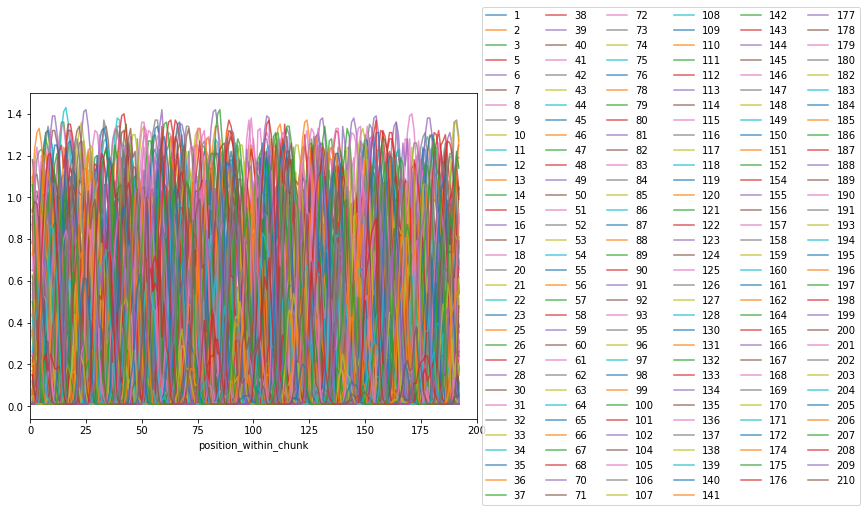

In [313]:
groups = df4.groupby('chunkID')

fig, ax = plt.subplots(figsize=(8,6))
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='position_within_chunk', y='Solar.radiation_64',kind ='line',label=k, alpha=.75, ax=ax, legend=True)
    plt.xlim(0, 200)
plt.legend(loc='center left',ncol=6, bbox_to_anchor=(1, 0.5))
#ax.legend()
print('Solar Radiation')

plt.savefig('image.png')

210

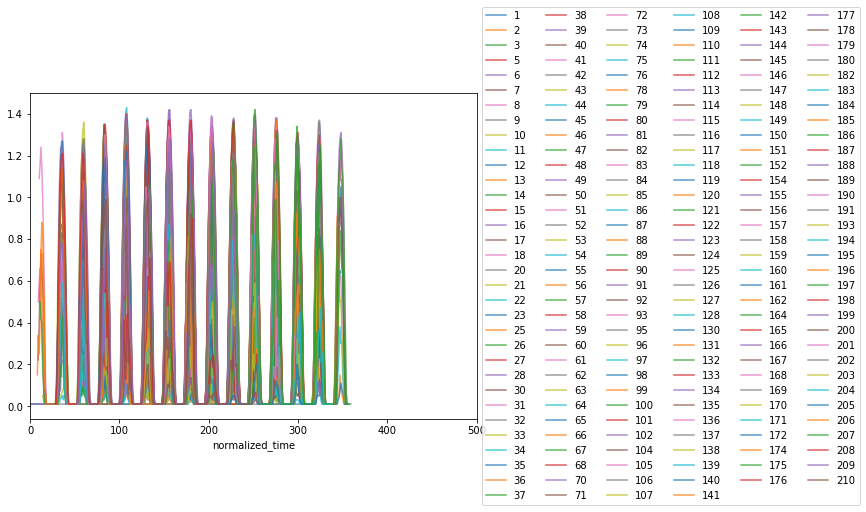

In [309]:
groups = df4.groupby('chunkID')

fig, ax = plt.subplots(figsize=(8,6))
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='Solar.radiation_64',kind ='line',label=k, alpha=.75, ax=ax, legend=True)
    plt.xlim(0, 500)
plt.legend(loc='center left',ncol=6, bbox_to_anchor=(1, 0.5))
#ax.legend()
k

Solar Radiation


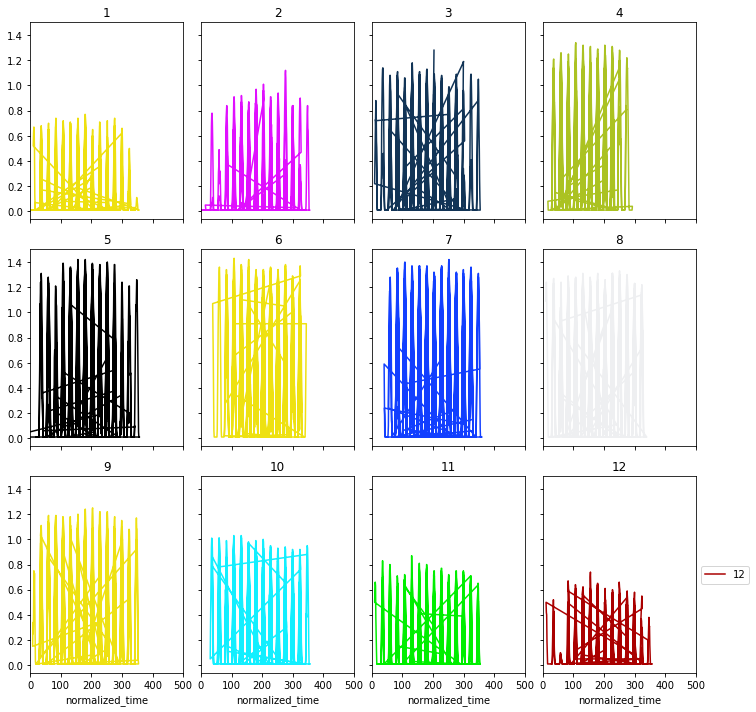

In [307]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='Solar.radiation_64', c=colors[k],kind ='line',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print ('Solar Radiation')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Solar Radiation


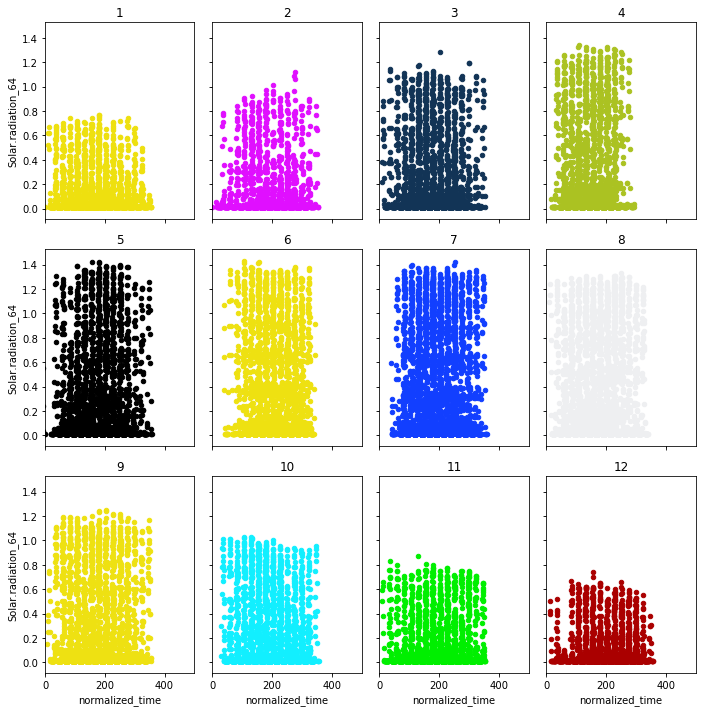

In [314]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='Solar.radiation_64', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print ('Solar Radiation')    
plt.tight_layout()

In [315]:
v

rowID  chunkID  position_within_chunk  month_most_common   weekday  \
3449    5545       22                      1                 12  Saturday   
3450    5546       22                      2                 12  Saturday   
3451    5547       22                      3                 12    Sunday   
3452    5548       22                      4                 12    Sunday   
3453    5549       22                      5                 12    Sunday   
3454    5550       22                      6                 12    Sunday   
3455    5551       22                      7                 12    Sunday   
3456    5552       22                      8                 12    Sunday   
3457    5553       22                      9                 12    Sunday   
3458    5554       22                     10                 12    Sunday   
3459    5555       22                     11                 12    Sunday   
3460    5556       22                     12                 12    Sunday   
3461    5557       22                     13                 12    Sunday   
3462    5558       22                     14                 12    Sunday   
3463    5559       22                     15                 12    Sunday   
3464    5560       22                     16                 12    Sunday   
3465    5561       22                     17                 12    Sunday   
3466    5562       22                     18                 12    Sunday   
3467    5563       22                     19                 12    Sunday   
3468    5564       22                     20                 12    Sunday   
3469    5565       22                     21                 12    Sunday   
3470    5566       22                     22                 12    Sunday   
3471    5567       22                     23                 12    Sunday   
3472    5568       22                     24                 12    Sunday   
3473    5569       22                     25                 12    Sunday   
3474    5570       22                     26                 12    Sunday   
3475    5571       22                     27                 12    Monday   
3476    5572       22                     28                 12    Monday   
3477    5573       22                     29                 12    Monday   
3478    5574       22                     30                 12    Monday   
...      ...      ...                    ...                ...       ...   
35164  54019      205                    163                 12    Friday   
35165  54020      205                    164                 12    Friday   
35166  54021      205                    165                 12    Friday   
35167  54022      205                    166                 12    Friday   
35168  54023      205                    167                 12    Friday   
35169  54024      205                    168                 12    Friday   
35170  54025      205                    169                 12    Friday   
35171  54026      205                    170                 12    Friday   
35172  54027      205                    171                 12    Friday   
35173  54028      205                    172                 12    Friday   
35174  54029      205                    173                 12    Friday   
35175  54030      205                    174                 12    Friday   
35176  54031      205                    175                 12    Friday   
35177  54032      205                    176                 12    Friday   
35178  54033      205                    177                 12    Friday   
35179  54034      205                    178                 12    Friday   
35180  54035      205                    179                 12    Friday   
35181  54036      205                    180                 12    Friday   
35182  54037      205                    181                 12  Saturday   
35183  54038      205                    182                 12  Saturday   
351

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


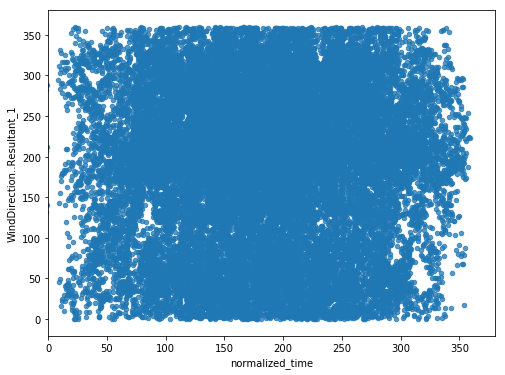

In [236]:
groups = df4.groupby('chunkID')

fig, ax = plt.subplots(figsize=(8,6))
plt.xlim(0, 380)
for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1',kind ='scatter',label=k, alpha=.75, ax=ax,legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [187]:
v

rowID  chunkID  position_within_chunk  month_most_common   weekday  \
35002  53857      205                      1                 12    Friday   
35003  53858      205                      2                 12    Friday   
35004  53859      205                      3                 12    Friday   
35005  53860      205                      4                 12    Friday   
35006  53861      205                      5                 12    Friday   
35007  53862      205                      6                 12    Friday   
35008  53863      205                      7                 12    Friday   
35009  53864      205                      8                 12    Friday   
35010  53865      205                      9                 12    Friday   
35011  53866      205                     10                 12    Friday   
35012  53867      205                     11                 12    Friday   
35013  53868      205                     12                 12    Friday   
35014  53869      205                     13                 12  Saturday   
35015  53870      205                     14                 12  Saturday   
35016  53871      205                     15                 12  Saturday   
35017  53872      205                     16                 12  Saturday   
35018  53873      205                     17                 12  Saturday   
35019  53874      205                     18                 12  Saturday   
35020  53875      205                     19                 12  Saturday   
35021  53876      205                     20                 12  Saturday   
35022  53877      205                     21                 12  Saturday   
35023  53878      205                     22                 12  Saturday   
35024  53879      205                     23                 12  Saturday   
35025  53880      205                     24                 12  Saturday   
35026  53881      205                     25                 12  Saturday   
35027  53882      205                     26                 12  Saturday   
35028  53883      205                     27                 12  Saturday   
35029  53884      205                     28                 12  Saturday   
35030  53885      205                     29                 12  Saturday   
35031  53886      205                     30                 12  Saturday   
...      ...      ...                    ...                ...       ...   
35164  54019      205                    163                 12    Friday   
35165  54020      205                    164                 12    Friday   
35166  54021      205                    165                 12    Friday   
35167  54022      205                    166                 12    Friday   
35168  54023      205                    167                 12    Friday   
35169  54024      205                    168                 12    Friday   
35170  54025      205                    169                 12    Friday   
35171  54026      205                    170                 12    Friday   
35172  54027      205                    171                 12    Friday   
35173  54028      205                    172                 12    Friday   
35174  54029      205                    173                 12    Friday   
35175  54030      205                    174                 12    Friday   
35176  54031      205                    175                 12    Friday   
35177  54032      205                    176                 12    Friday   
35178  54033      205                    177                 12    Friday   
35179  54034      205                    178                 12    Friday   
35180  54035      205                    179                 12    Friday   
35181  54036      205                    180                 12    Friday   
35182  54037      205                    181                 12  Saturday   
35183  54038      205                    182                 12  Saturday   
351

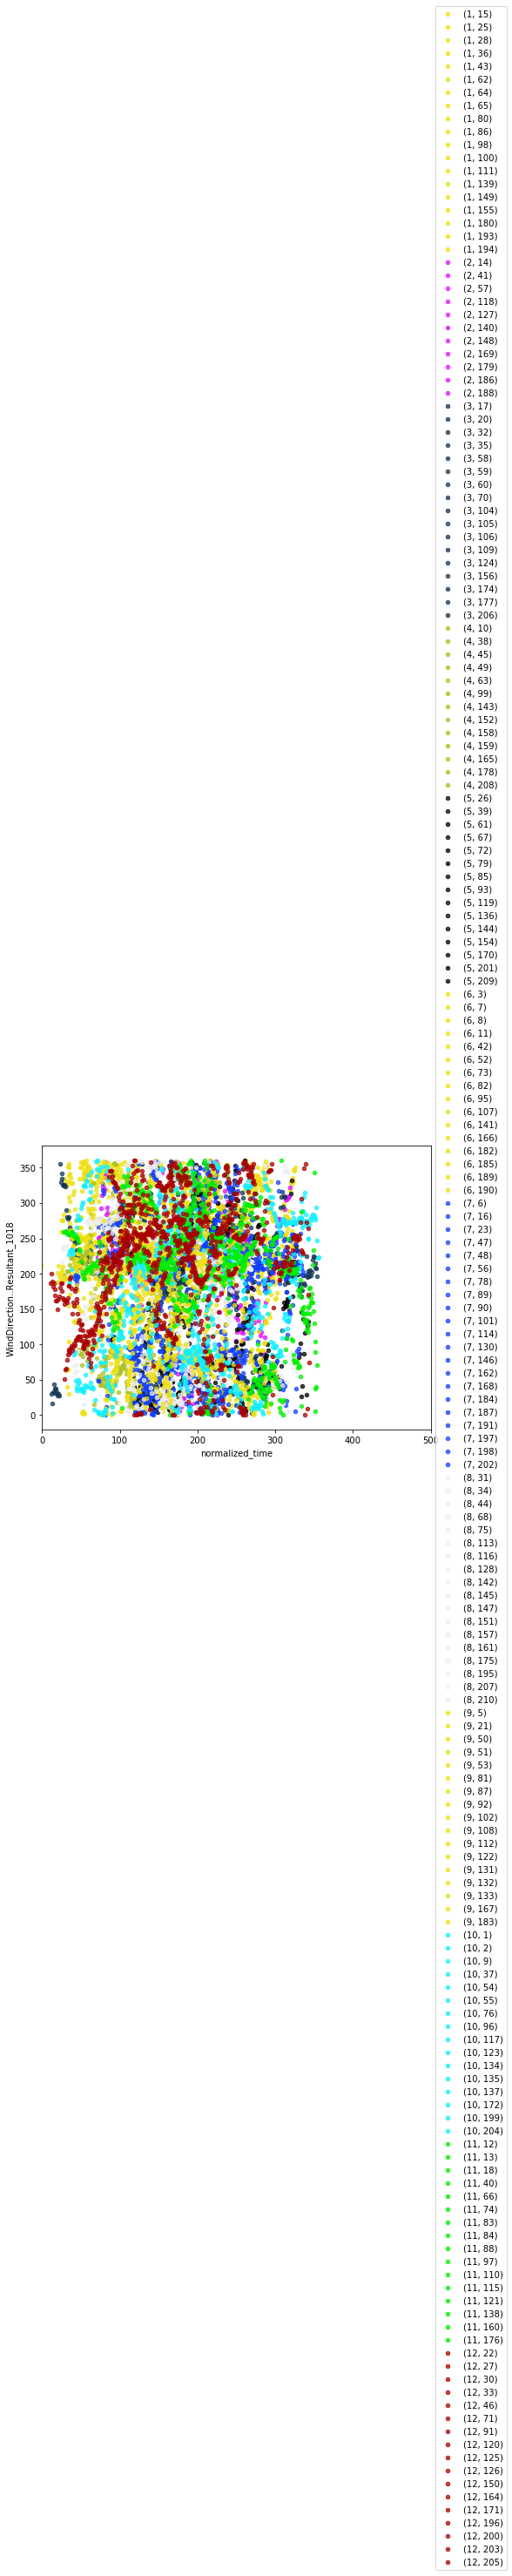

In [238]:
groups = df4.groupby(['month_most_common', 'chunkID'])
fig, ax = plt.subplots(figsize=(8,6))
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1018',kind ='scatter',c=colors[k[0]],label=k, alpha=.75, ax=ax, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


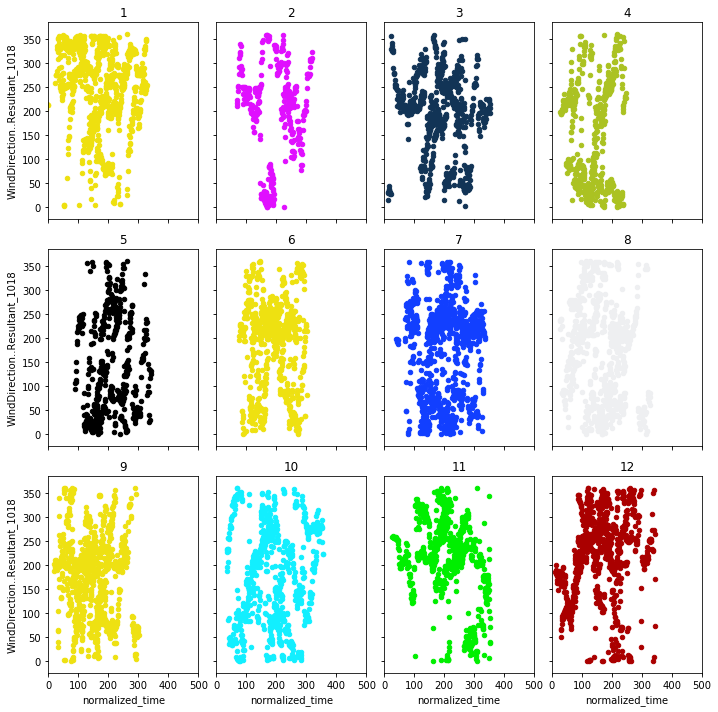

In [4]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='WindDirection..Resultant_1018', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

In [240]:
v

rowID  chunkID  position_within_chunk  month_most_common   weekday  \
3449    5545       22                      1                 12  Saturday   
3450    5546       22                      2                 12  Saturday   
3451    5547       22                      3                 12    Sunday   
3452    5548       22                      4                 12    Sunday   
3453    5549       22                      5                 12    Sunday   
3454    5550       22                      6                 12    Sunday   
3455    5551       22                      7                 12    Sunday   
3456    5552       22                      8                 12    Sunday   
3457    5553       22                      9                 12    Sunday   
3458    5554       22                     10                 12    Sunday   
3459    5555       22                     11                 12    Sunday   
3460    5556       22                     12                 12    Sunday   
3461    5557       22                     13                 12    Sunday   
3462    5558       22                     14                 12    Sunday   
3463    5559       22                     15                 12    Sunday   
3464    5560       22                     16                 12    Sunday   
3465    5561       22                     17                 12    Sunday   
3466    5562       22                     18                 12    Sunday   
3467    5563       22                     19                 12    Sunday   
3468    5564       22                     20                 12    Sunday   
3469    5565       22                     21                 12    Sunday   
3470    5566       22                     22                 12    Sunday   
3471    5567       22                     23                 12    Sunday   
3472    5568       22                     24                 12    Sunday   
3473    5569       22                     25                 12    Sunday   
3474    5570       22                     26                 12    Sunday   
3475    5571       22                     27                 12    Monday   
3476    5572       22                     28                 12    Monday   
3477    5573       22                     29                 12    Monday   
3478    5574       22                     30                 12    Monday   
...      ...      ...                    ...                ...       ...   
35164  54019      205                    163                 12    Friday   
35165  54020      205                    164                 12    Friday   
35166  54021      205                    165                 12    Friday   
35167  54022      205                    166                 12    Friday   
35168  54023      205                    167                 12    Friday   
35169  54024      205                    168                 12    Friday   
35170  54025      205                    169                 12    Friday   
35171  54026      205                    170                 12    Friday   
35172  54027      205                    171                 12    Friday   
35173  54028      205                    172                 12    Friday   
35174  54029      205                    173                 12    Friday   
35175  54030      205                    174                 12    Friday   
35176  54031      205                    175                 12    Friday   
35177  54032      205                    176                 12    Friday   
35178  54033      205                    177                 12    Friday   
35179  54034      205                    178                 12    Friday   
35180  54035      205                    179                 12    Friday   
35181  54036      205                    180                 12    Friday   
35182  54037      205                    181                 12  Saturday   
35183  54038      205                    182                 12  Saturday   
351

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


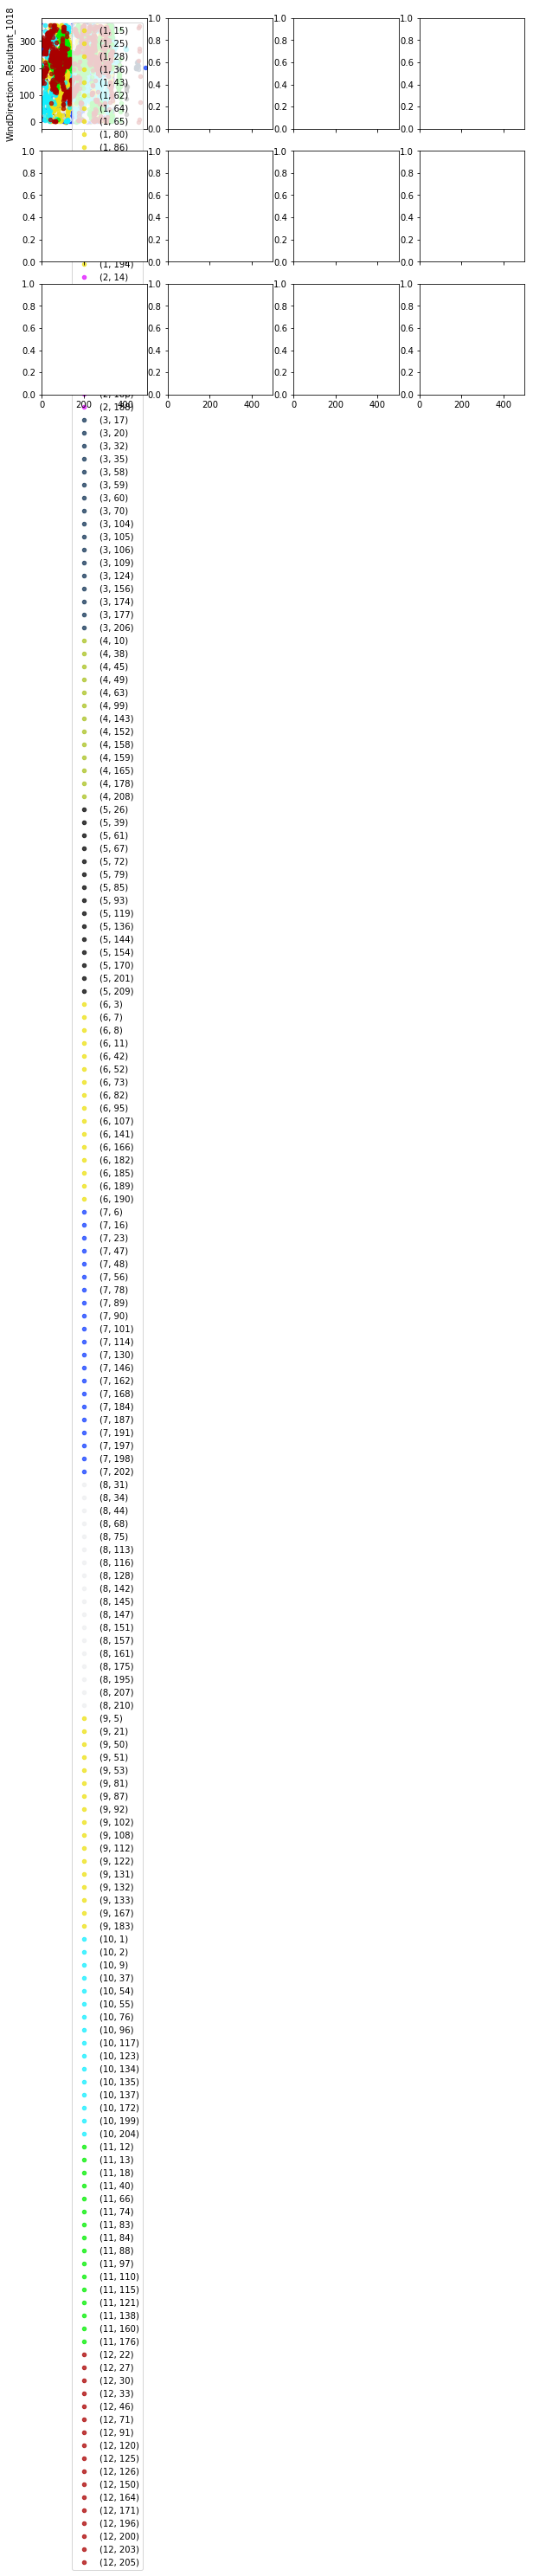

In [210]:
groups = df4.groupby(['month_most_common', 'chunkID'])

fig, ((ax1, ax2, ax3, ax4), (ax5,ax6, ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(figsize=(10,8),nrows=3, ncols=4, sharex=True, sharey=False )

colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
axis = {1:'ax1', 2:'ax2', 3:'ax3', 4:'ax4', 5:'ax5', 6:'ax6', 7:'ax7', 8:'ax8',9:'ax9',10:'ax10',11:'ax11',12:'ax12'}
plt.xlim(0, 500)

for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1018',kind ='scatter',c=colors[k[0]],label=k, alpha=.75, ax=ax1, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))







In [216]:
len(groups)

196

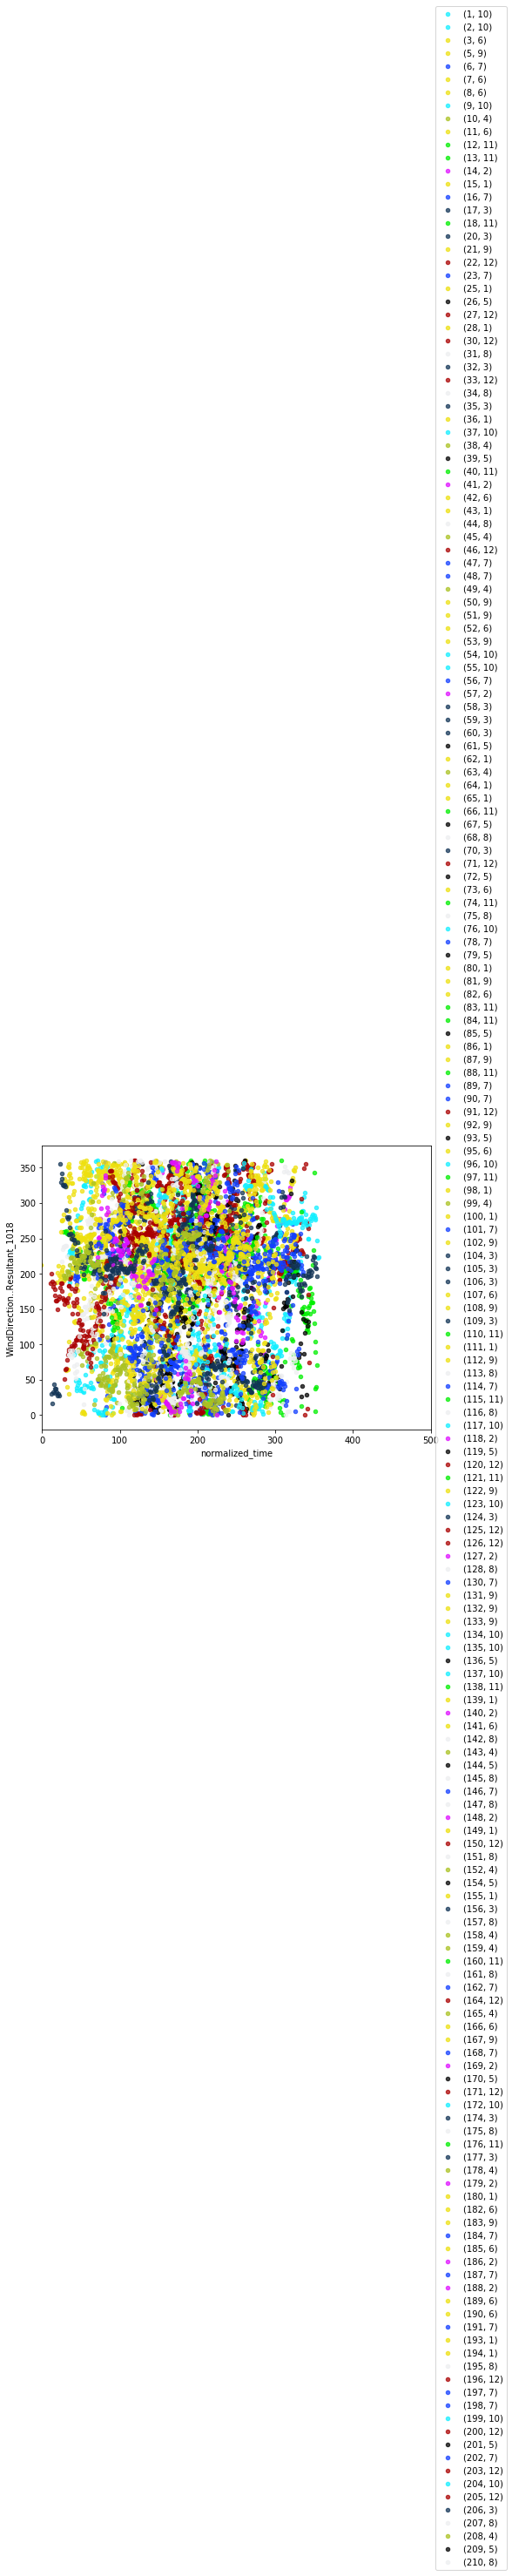

In [241]:
groups = df4.groupby(['chunkID','month_most_common'])

fig, ax = plt.subplots(figsize=(8,6))
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1018',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

KeyError: (1, 15)

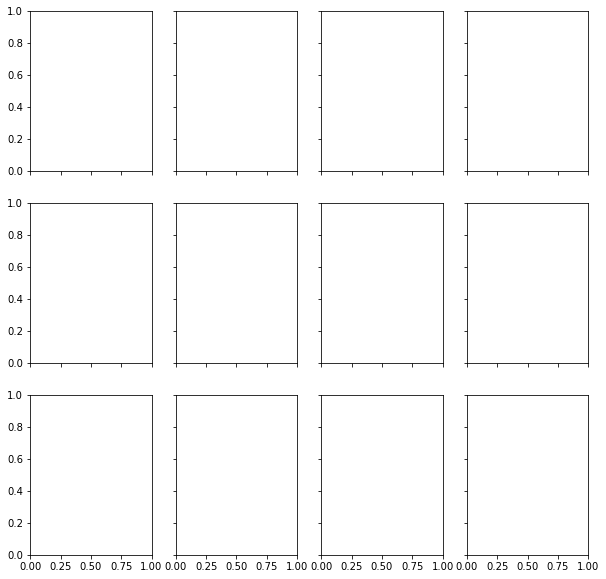

In [299]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common','chunkID']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='WindDirection..Resultant_1', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


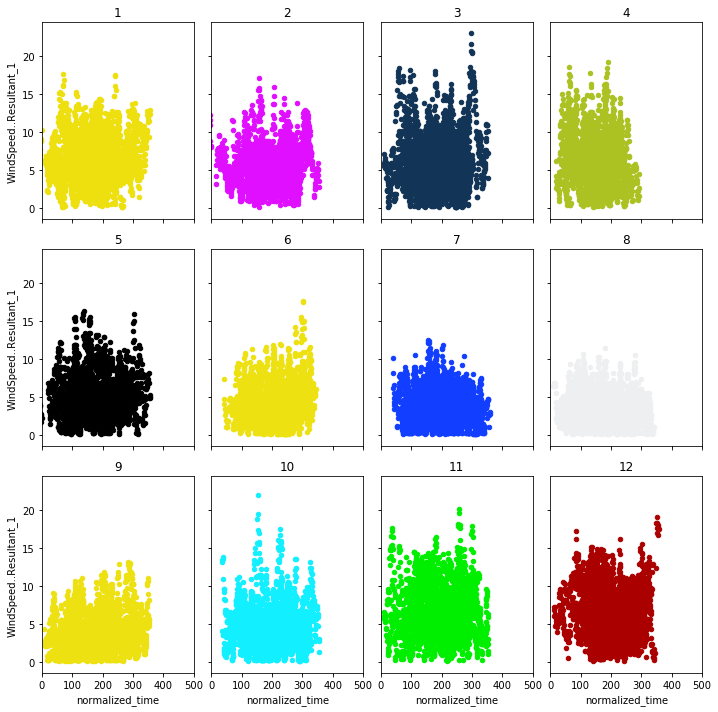

In [246]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='WindSpeed..Resultant_1', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


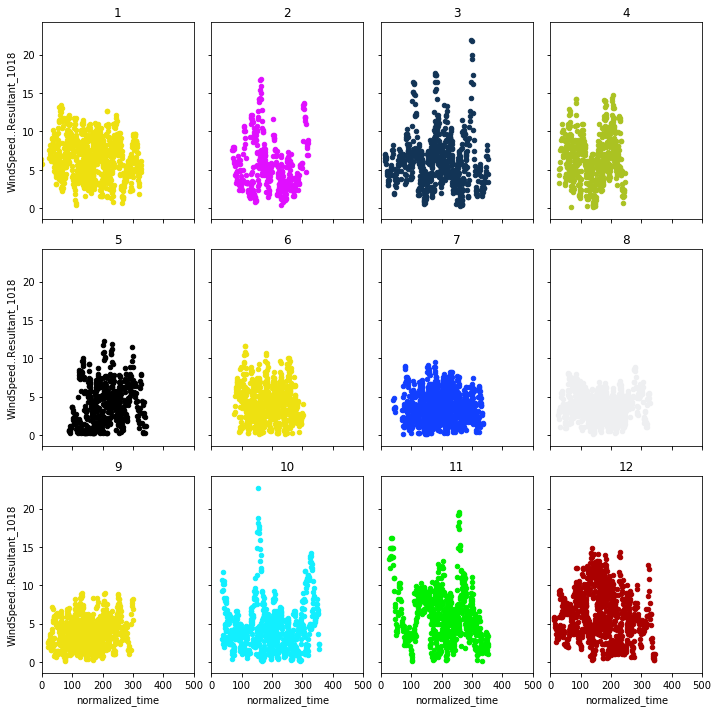

In [247]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='WindSpeed..Resultant_1018', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

Wind


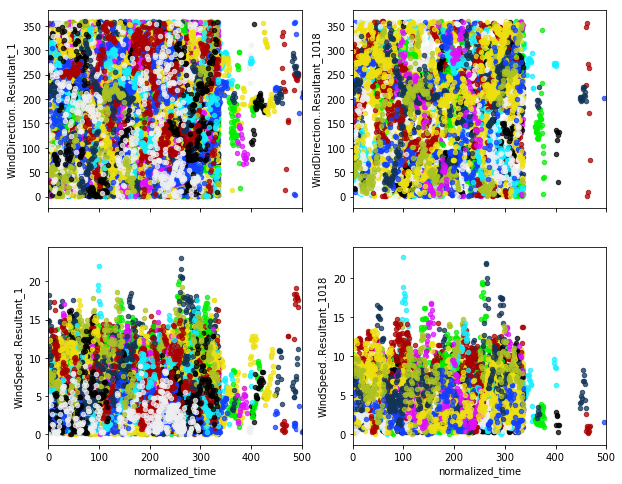

In [172]:

groups=df4.groupby(['chunkID','month_most_common'])

≈
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='WindDirection..Resultant_1',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='WindDirection..Resultant_1018',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='WindSpeed..Resultant_1',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='WindSpeed..Resultant_1018',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax4, legend=False)
print('Wind')

Ambient Max Temperature


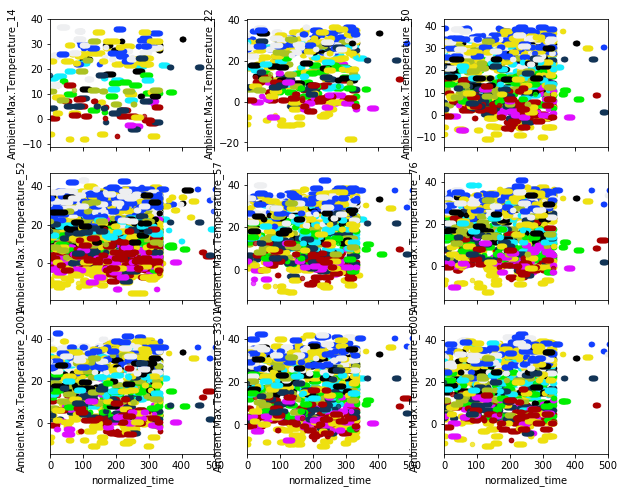

In [173]:
groups=df4.groupby(['chunkID','month_most_common'])

fig, ((ax1, ax2, ax3), (ax4, ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(figsize=(10,8),nrows=3, ncols=3, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_14',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_22',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_50',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_52',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_57',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_76',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax6, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_2001',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax7, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_3301',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax8, legend=False)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_6005',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax9, legend=False)
print('Ambient Max Temperature')

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


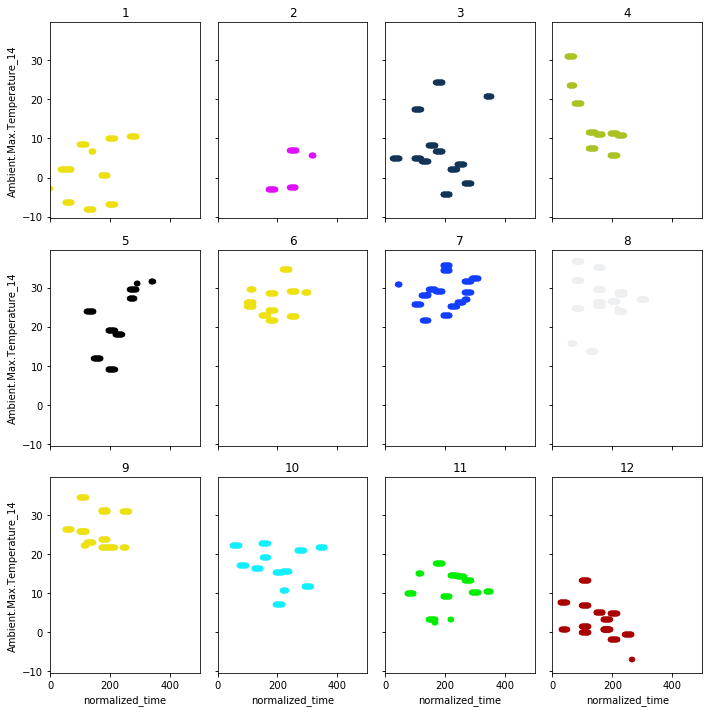

In [248]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_14', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


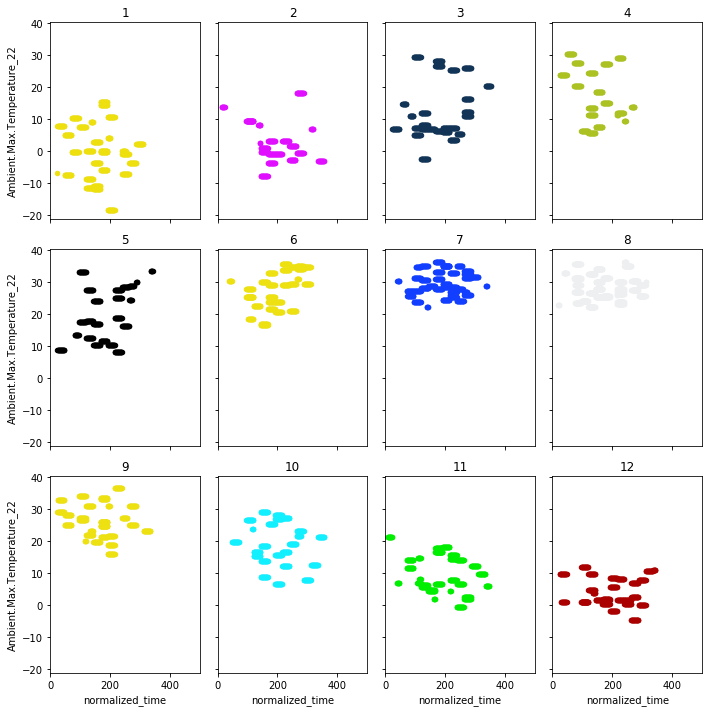

In [249]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_22', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

In [ ]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='Ambient.Max.Temperature_22', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

In [99]:
'''
for i, group in df4.groupby('chunkID'):
    plt.figure()
    group.plot(x='normalized_time', y='target_8_4002', kind ='scatter',title=str(i))
    
'''

"\nfor i, group in df4.groupby('chunkID'):\n    plt.figure()\n    group.plot(x='normalized_time', y='target_8_4002', kind ='scatter',title=str(i))\n    \n"

Target 11


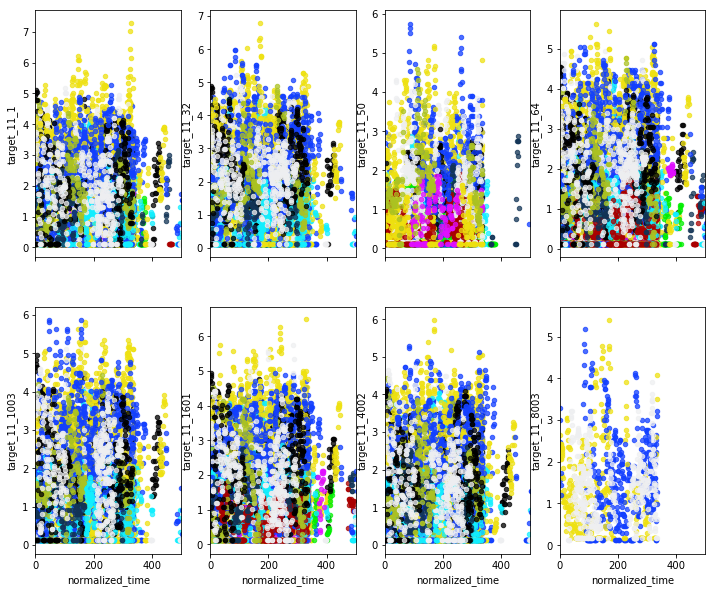

In [179]:
groups=df4.groupby(['chunkID','month_most_common'])

fig, ((ax1, ax2, ax3, ax4), (ax5,ax6,ax7,ax8)) = plt.subplots(figsize=(12,10),nrows=2, ncols=4, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_11_1',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_11_32',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_11_50',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_11_64',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='target_11_1003',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='target_11_1601',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax6, legend=False)
    v.plot(x='normalized_time', y='target_11_4002',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax7, legend=False)
    v.plot(x='normalized_time', y='target_11_8003',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax8, legend=False)
print('Target 11')   

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


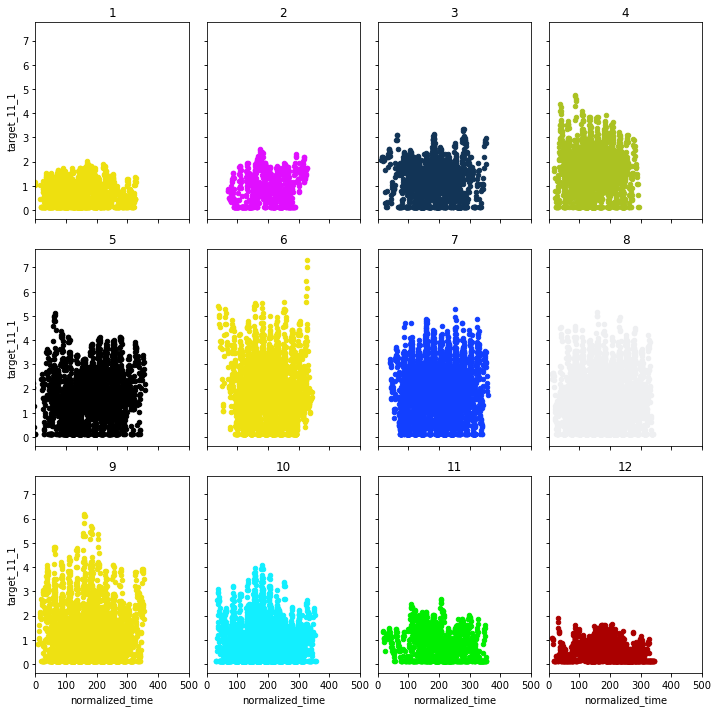

In [250]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_11_1', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_11_32


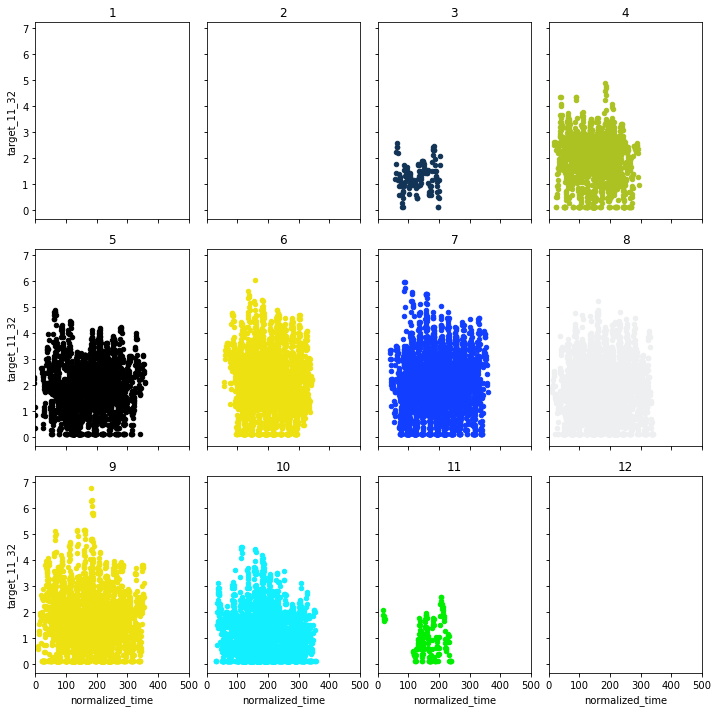

In [252]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_11_32', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_11_32')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_11_50


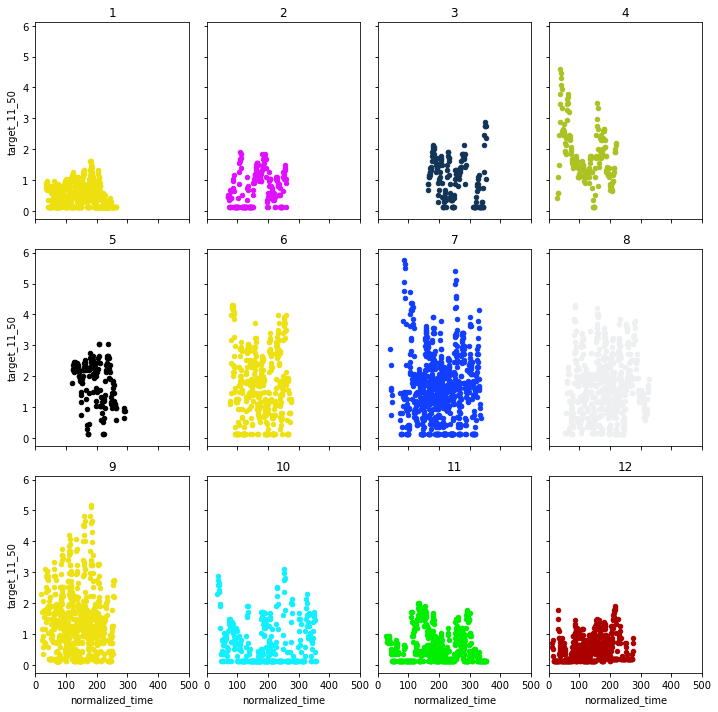

In [253]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_11_50', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_11_50')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_11_64


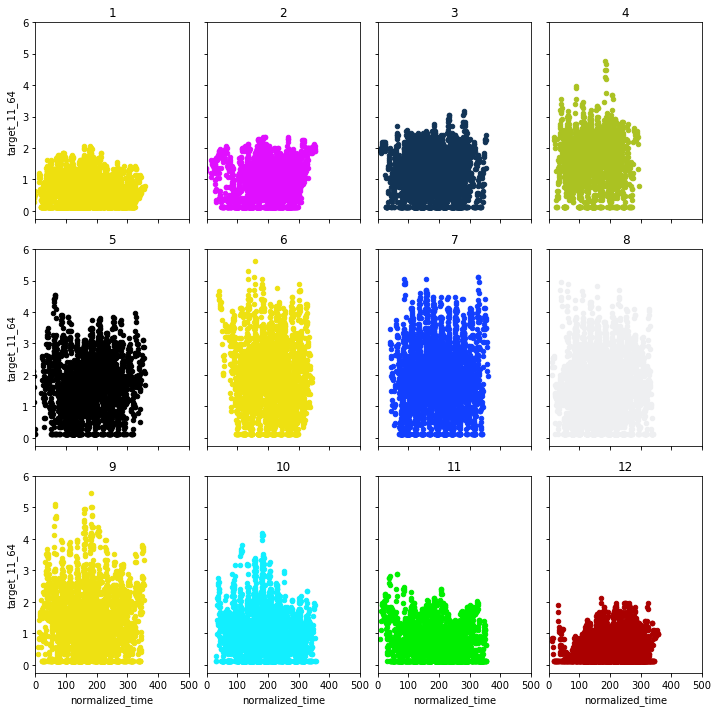

In [254]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_11_64', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_11_64')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_11_1003


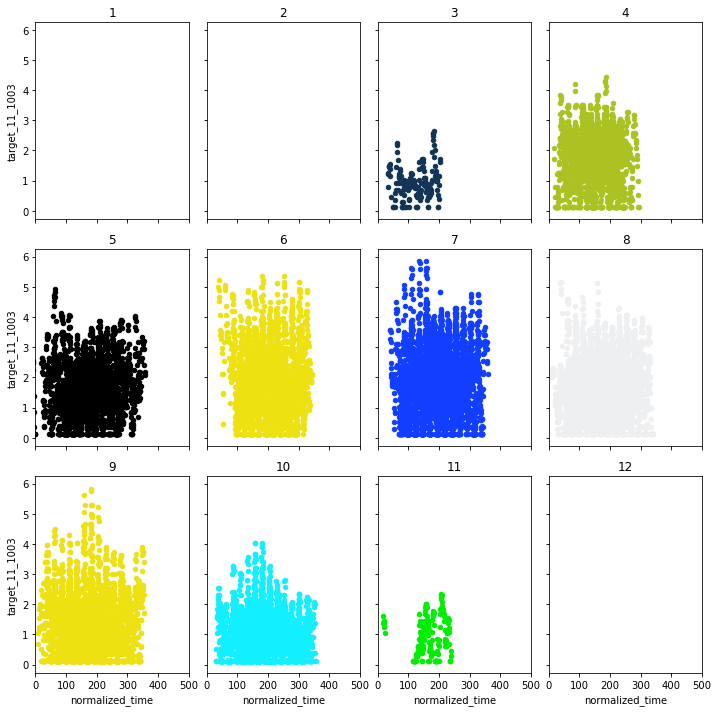

In [255]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_11_1003', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_11_1003')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_11_1601


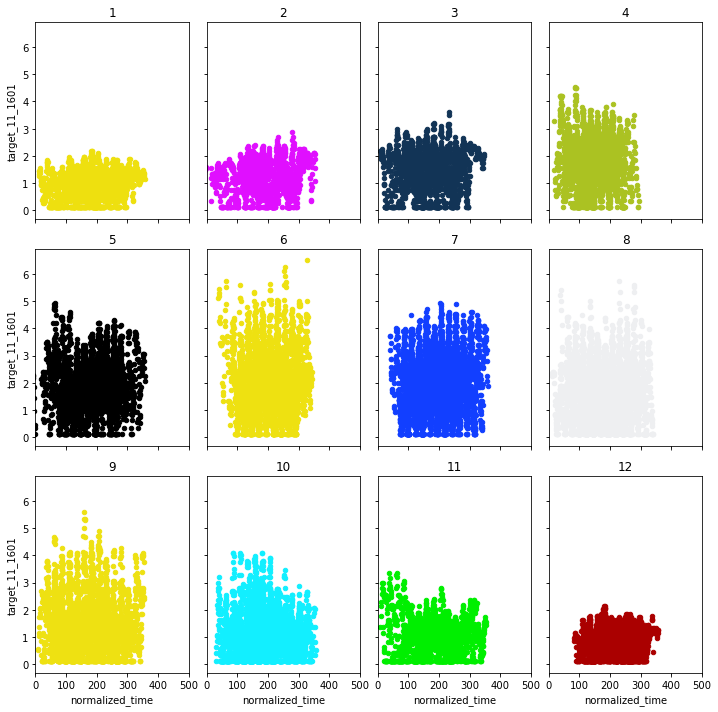

In [256]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_11_1601', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_11_1601')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_11_4002


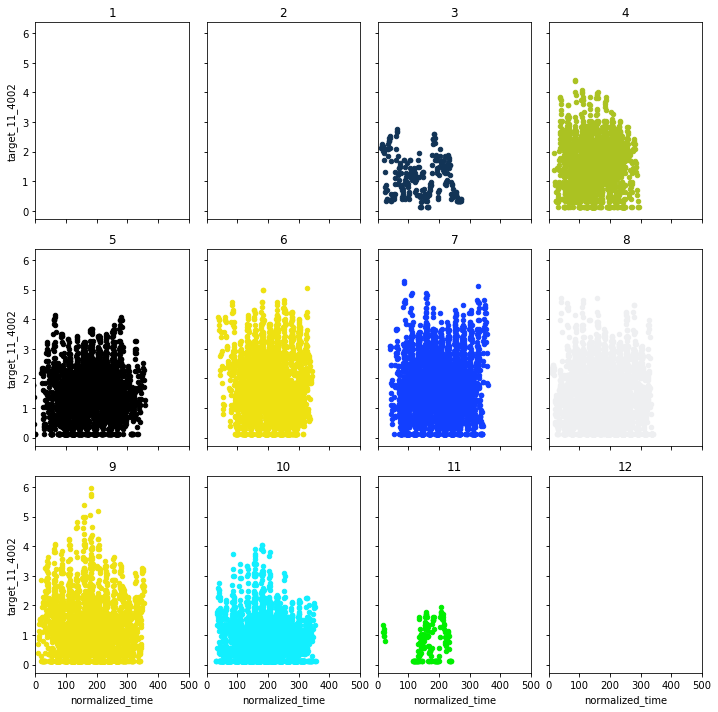

In [257]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_11_4002', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_11_4002')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_11_8003


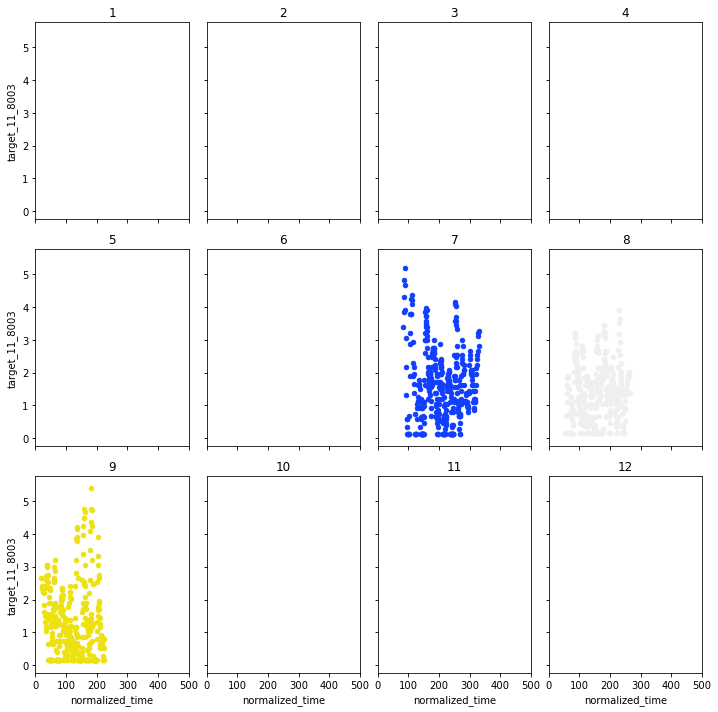

In [258]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_11_8003', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_11_8003')    
plt.tight_layout()

Target 3


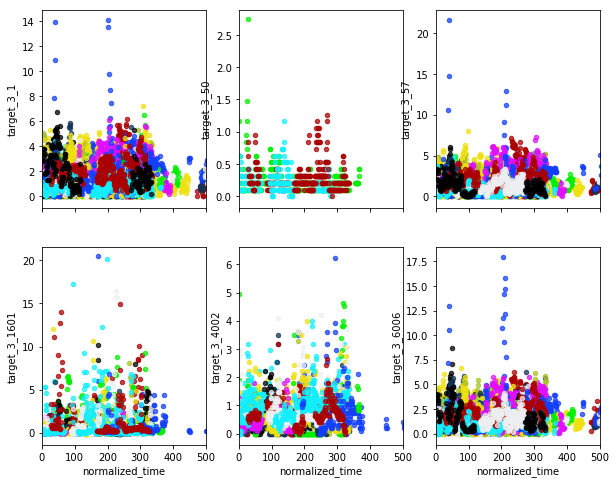

In [175]:
groups=df4.groupby(['chunkID','month_most_common'])

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(figsize=(10,8),nrows=2, ncols=3, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_3_1',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_3_50',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_3_57',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_3_1601',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='target_3_4002',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='target_3_6006',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax6, legend=False)
print('Target 3')    

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_3_1


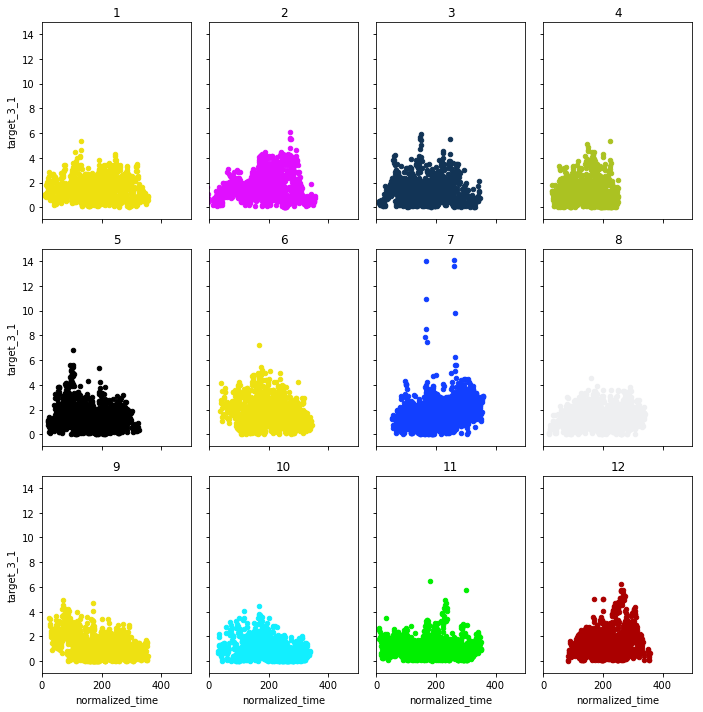

In [259]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_3_1', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_3_1')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_3_50


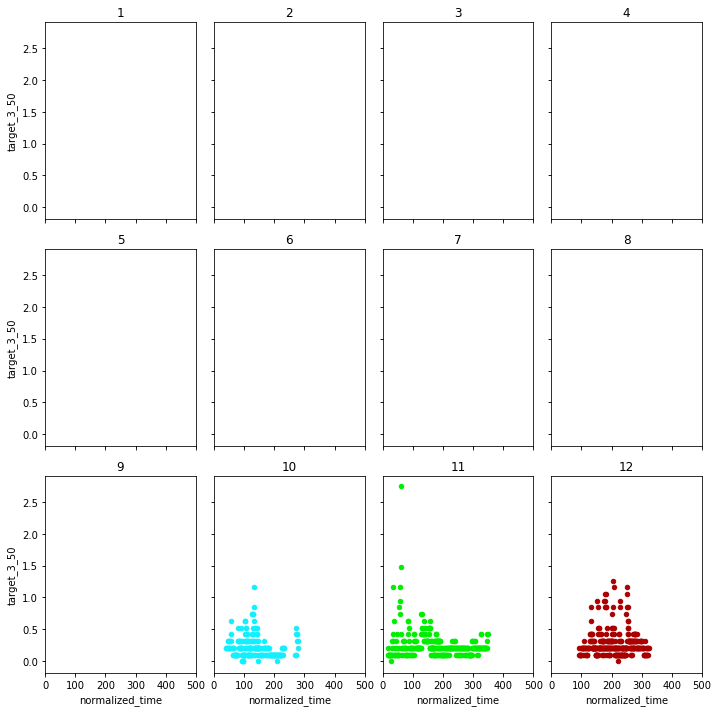

In [260]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_3_50', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_3_50')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_3_57


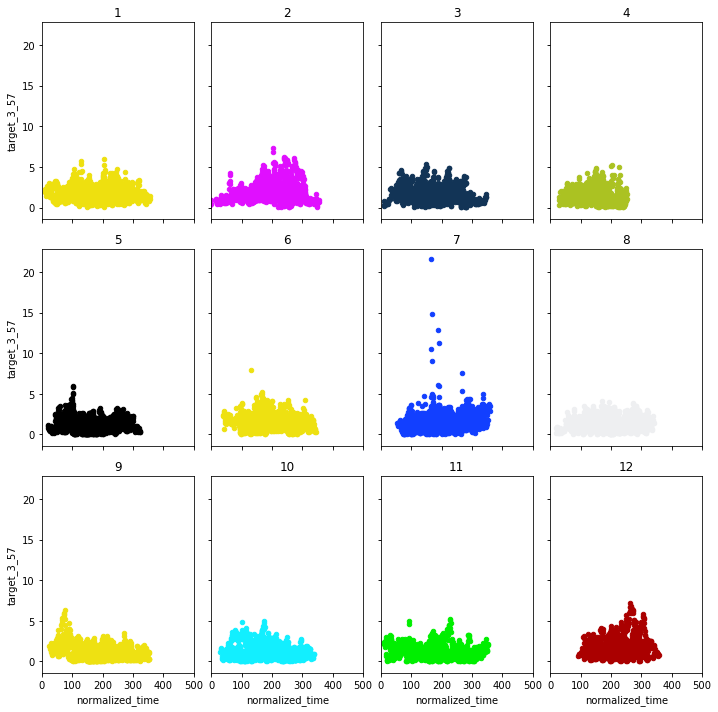

In [261]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_3_57', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_3_57')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_3_1601


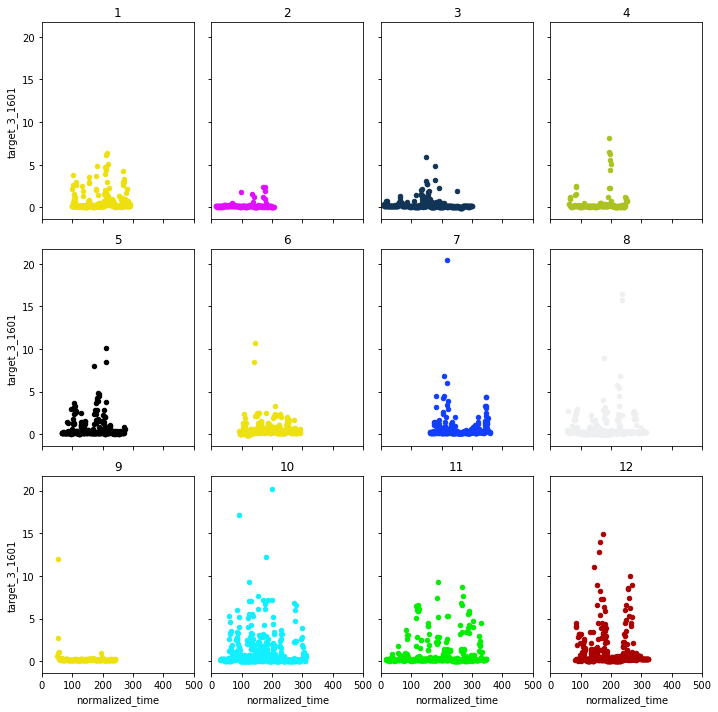

In [262]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_3_1601', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_3_1601')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_3_4002


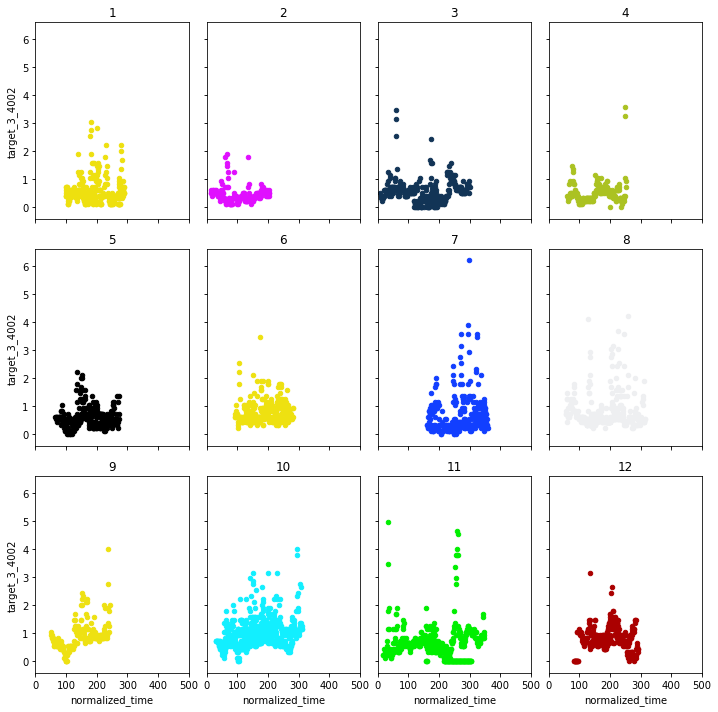

In [264]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_3_4002', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_3_4002')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_3_6006


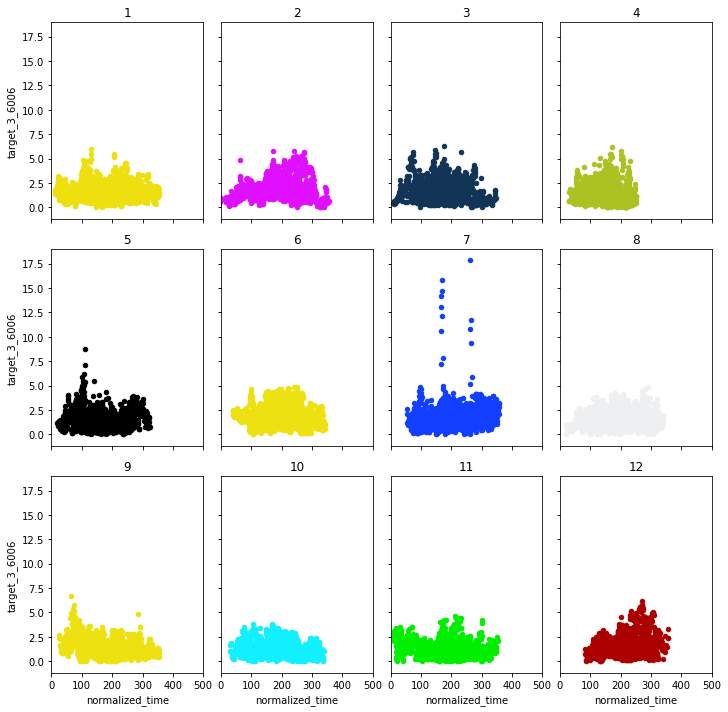

In [266]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_3_6006', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_3_6006')    
plt.tight_layout()

Target 4


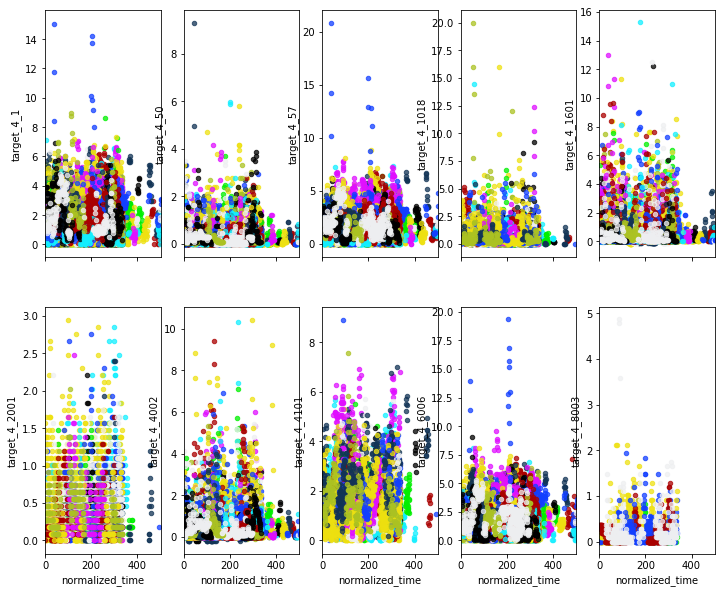

In [176]:
groups=df4.groupby(['chunkID','month_most_common'])

fig, ((ax1, ax2, ax3,ax4, ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(figsize=(12,10),nrows=2, ncols=5, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_4_1',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_4_50',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_4_57',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_4_1018',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='target_4_1601',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='target_4_2001',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax6, legend=False)
    v.plot(x='normalized_time', y='target_4_4002',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax7, legend=False)
    v.plot(x='normalized_time', y='target_4_4101',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax8, legend=False)
    v.plot(x='normalized_time', y='target_4_6006',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax9, legend=False)
    v.plot(x='normalized_time', y='target_4_8003',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax10, legend=False)
print('Target 4')

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_1


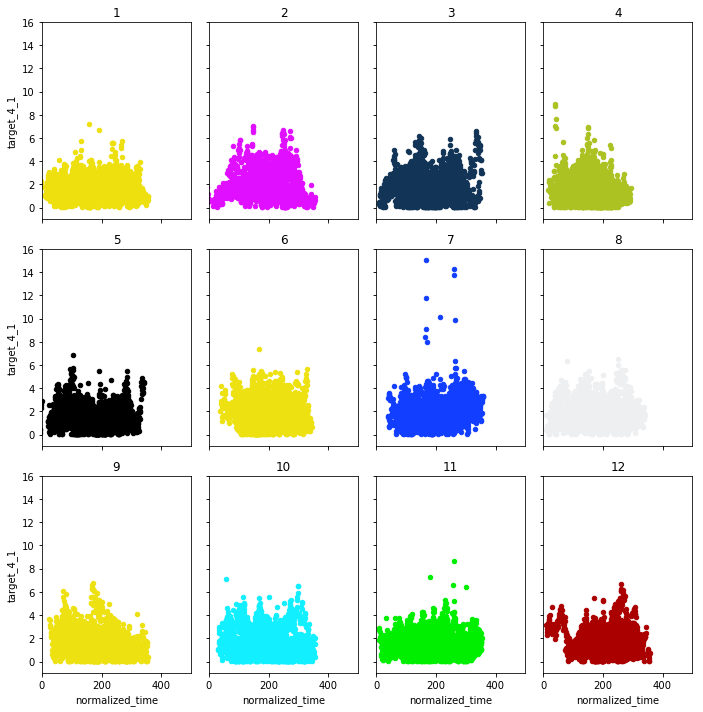

In [268]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_1', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_1')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_50


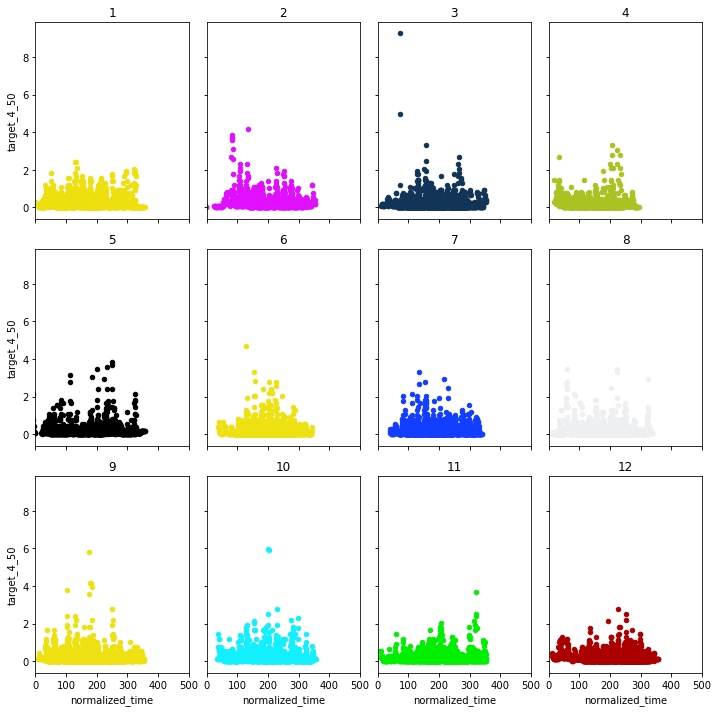

In [269]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_50', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_50')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_57


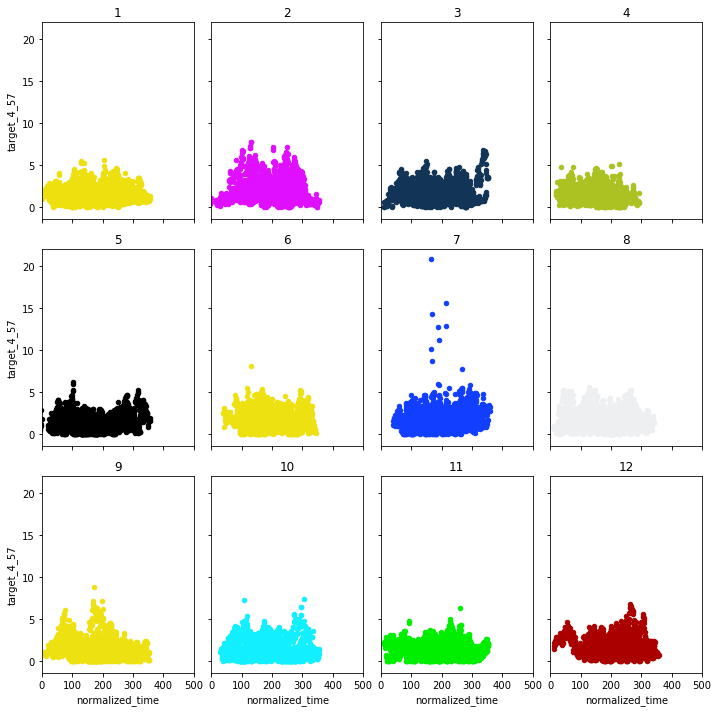

In [270]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_57', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_57')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_1018


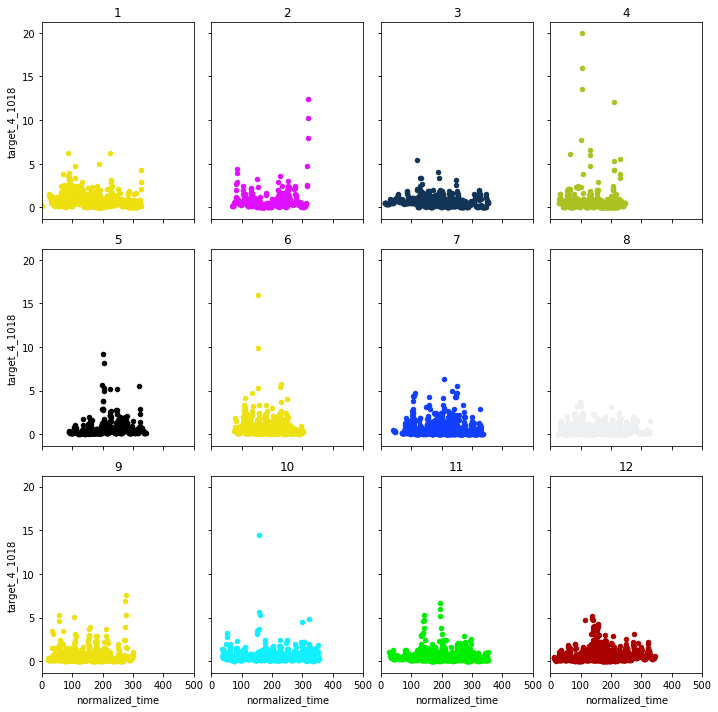

In [271]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_1018', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_1018')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_1601


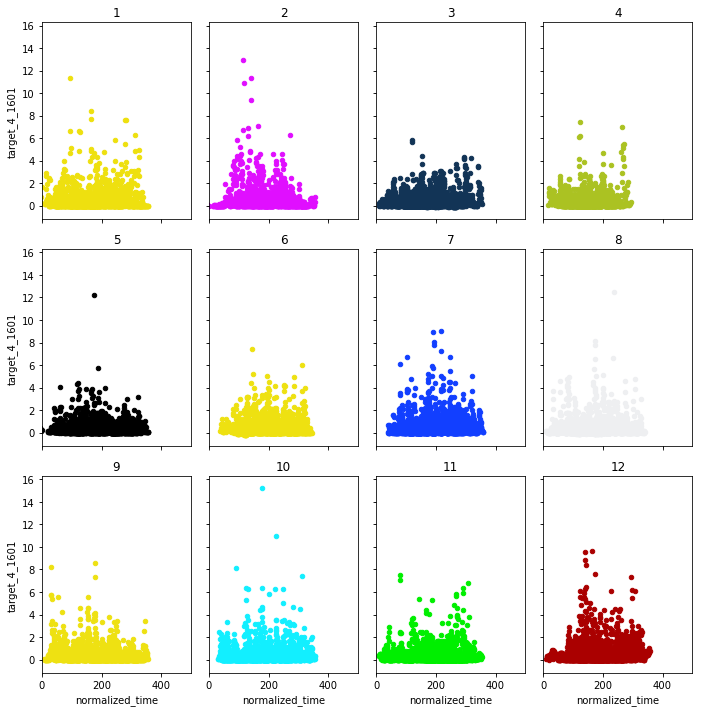

In [272]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_1601', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_1601')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_2001


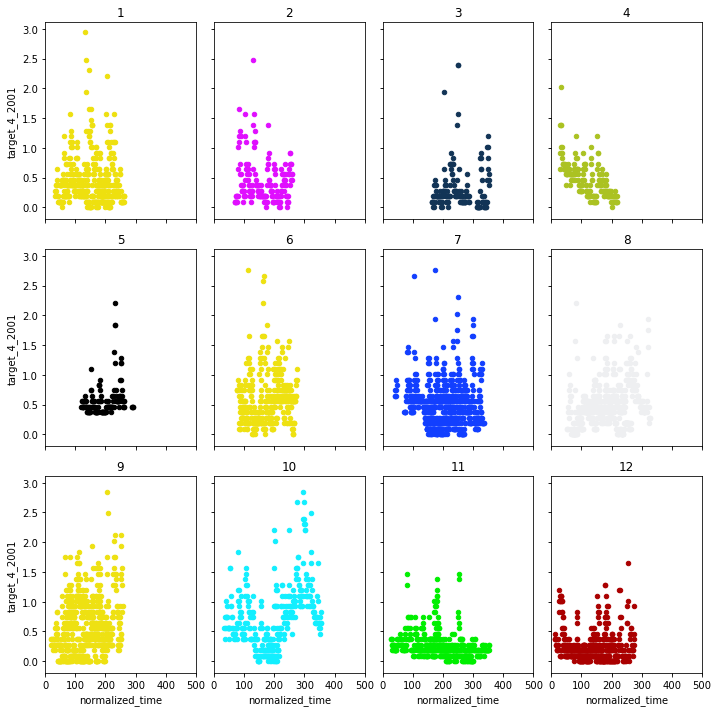

In [273]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_2001', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_2001')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_4002


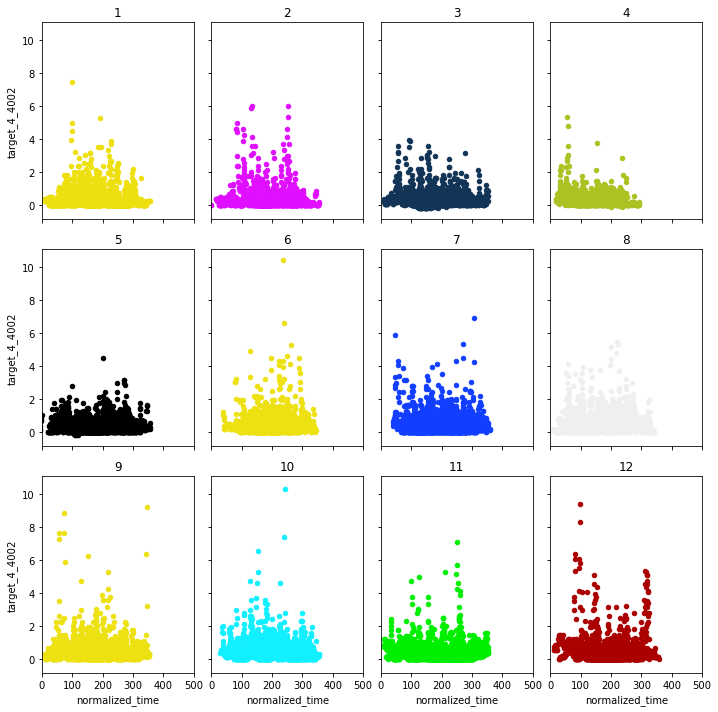

In [274]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_4002', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_4002')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_4101


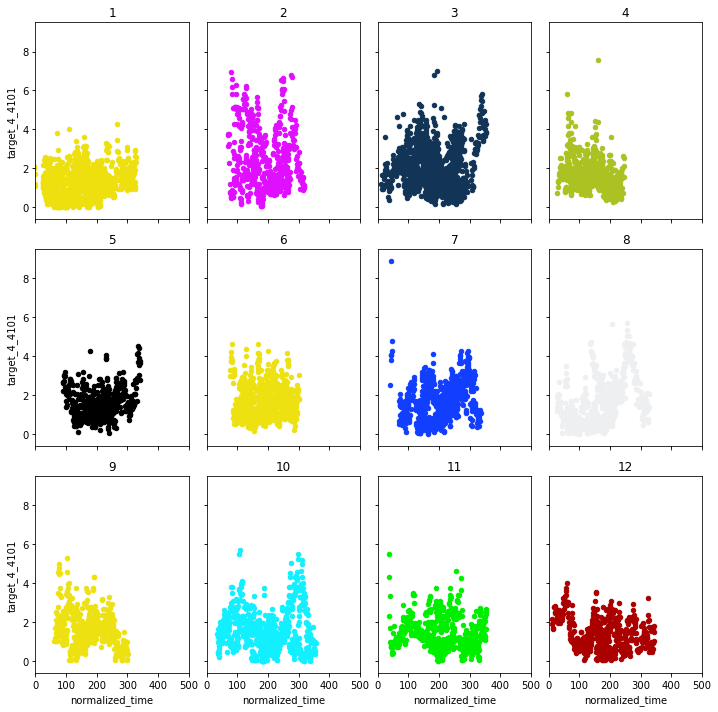

In [275]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_4101', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_4101')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_6006


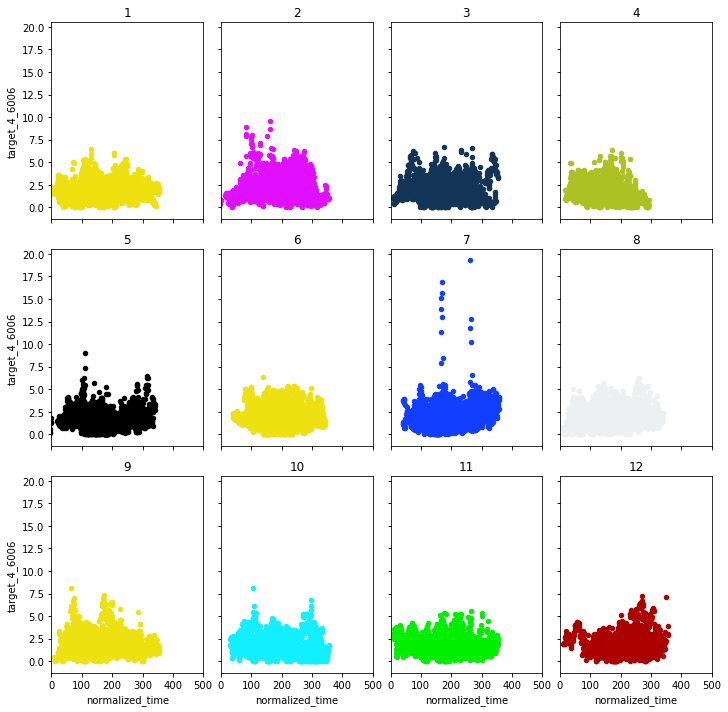

In [276]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_6006', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_6006')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_4_8003


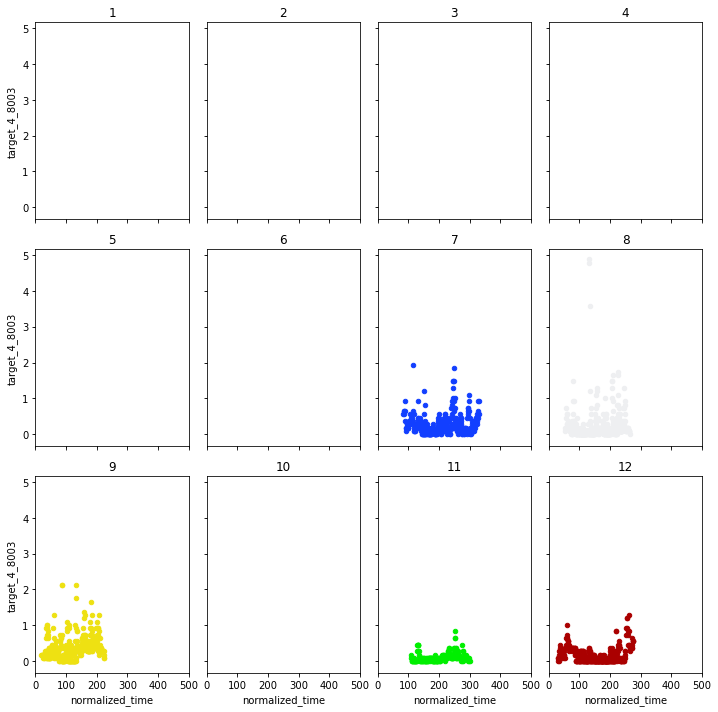

In [277]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_4_8003', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_4_8003')    
plt.tight_layout()

Target 8


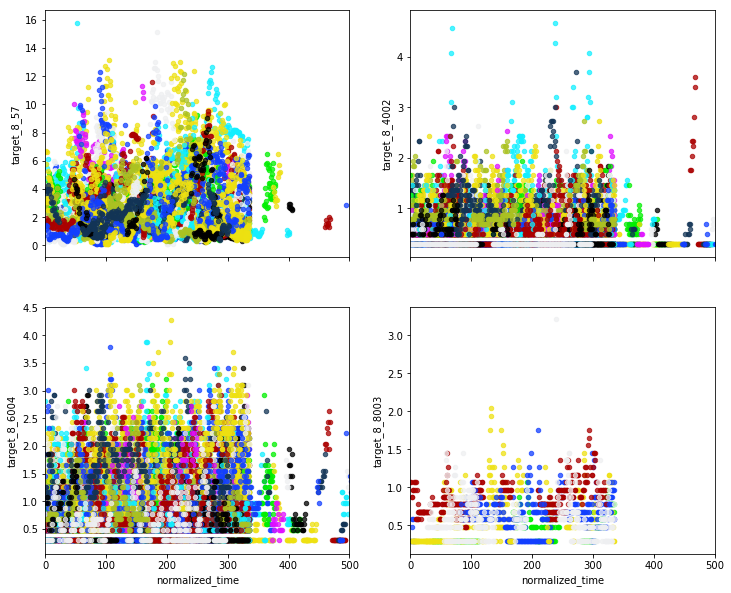

In [178]:
groups=df4.groupby(['chunkID','month_most_common'])

fig, ((ax1, ax2),( ax3,ax4)) = plt.subplots(figsize=(12,10),nrows=2, ncols=2, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_8_57',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_8_4002',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_8_6004',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_8_8003',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax4, legend=False)
print('Target 8')    

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_8_57


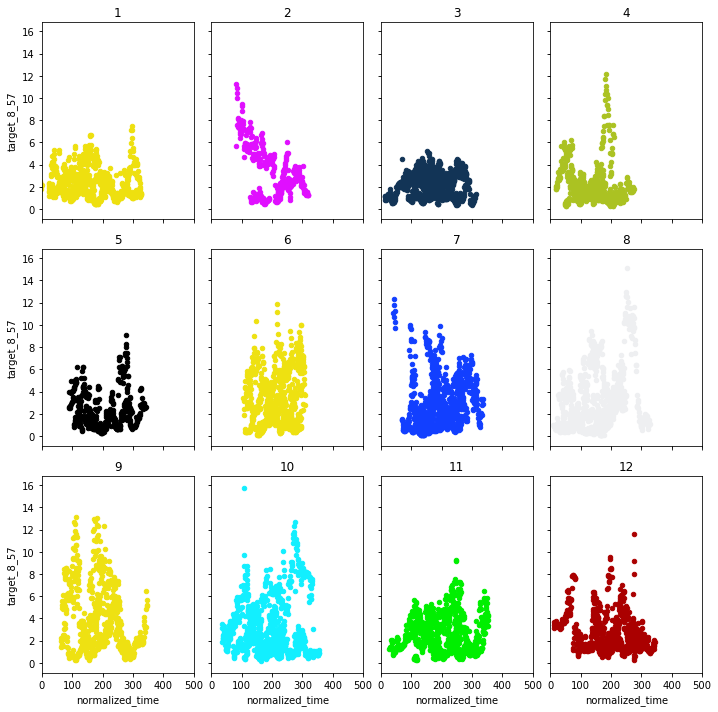

In [278]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_8_57', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_8_57')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_8_4002


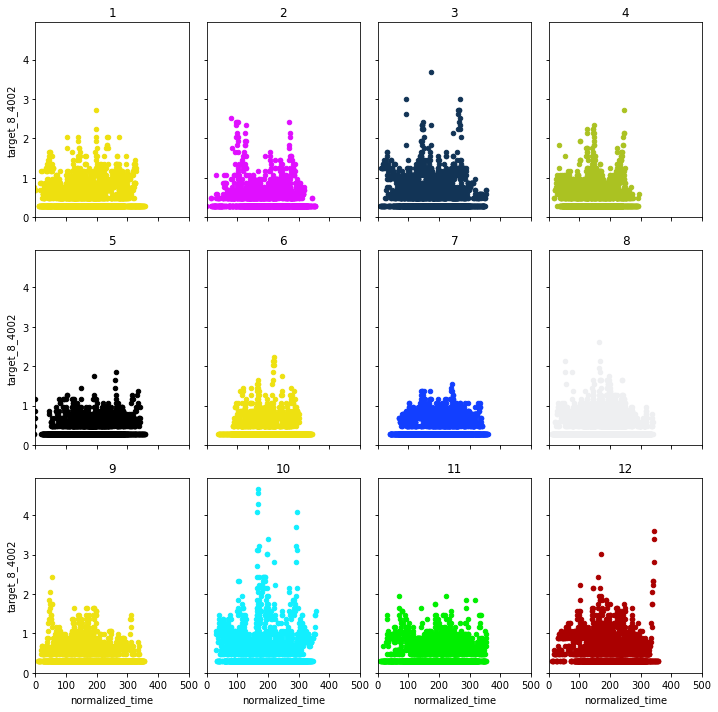

In [279]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_8_4002', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_8_4002')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_8_6004


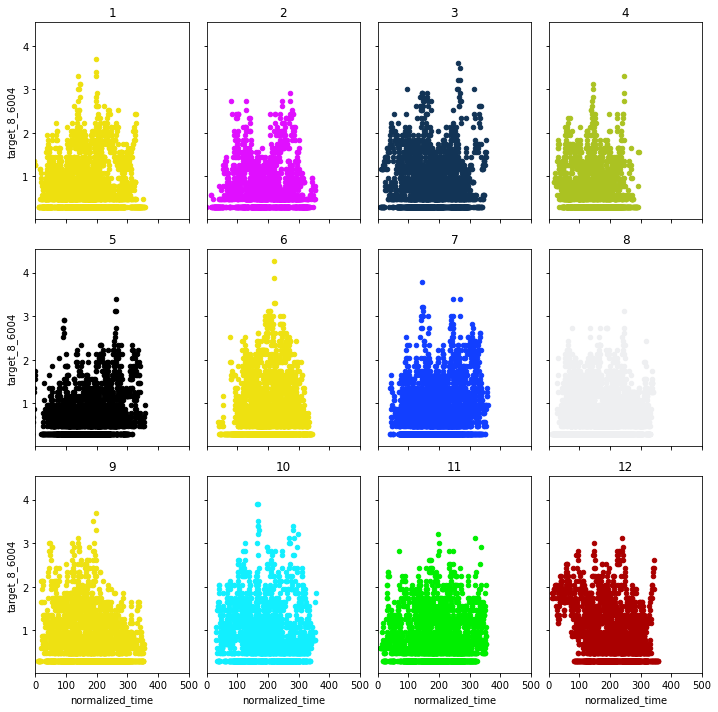

In [280]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_8_6004', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_8_6004')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_8_8003


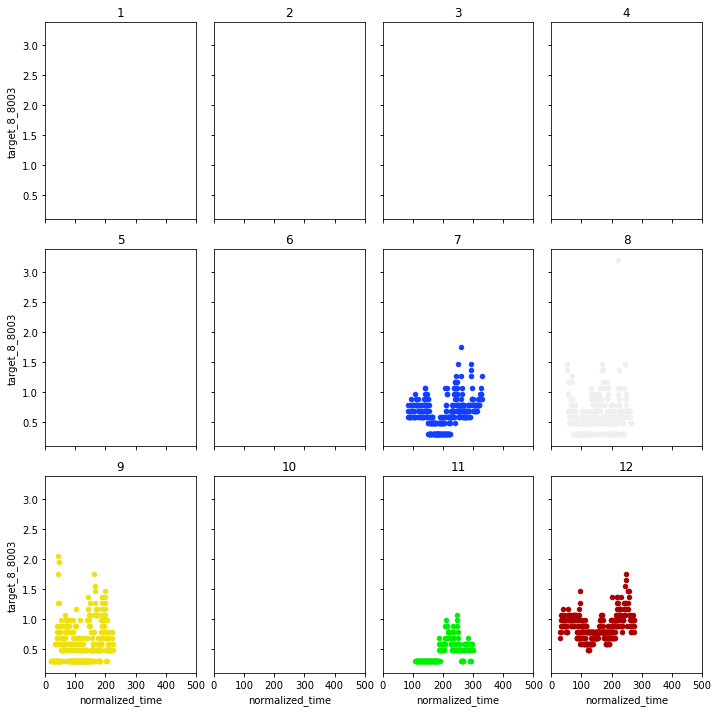

In [281]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_8_8003', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_8_8003')    
plt.tight_layout()

In [289]:
v.groupby('chunkID').head()

rowID  chunkID  position_within_chunk  month_most_common    weekday  \
3449    5545       22                      1                 12   Saturday   
3450    5546       22                      2                 12   Saturday   
3451    5547       22                      3                 12     Sunday   
3452    5548       22                      4                 12     Sunday   
3453    5549       22                      5                 12     Sunday   
4217    6865       27                      1                 12     Friday   
4218    6866       27                      2                 12     Friday   
4219    6867       27                      3                 12     Friday   
4220    6868       27                      4                 12     Friday   
4221    6869       27                      5                 12     Friday   
4601    7657       30                      1                 12   Saturday   
4602    7658       30                      2                 12   Saturday   
4603    7659       30                      3                 12   Saturday   
4604    7660       30                      4                 12   Saturday   
4605    7661       30                      5                 12   Saturday   
5129    8449       33                      1                 12  Wednesday   
5130    8450       33                      2                 12  Wednesday   
5131    8451       33                      3                 12  Wednesday   
5132    8452       33                      4                 12  Wednesday   
5133    8453       33                      5                 12  Wednesday   
7584   11881       46                      1                 12     Friday   
7585   11882       46                      2                 12     Friday   
7586   11883       46                      3                 12     Friday   
7587   11884       46                      4                 12     Friday   
7588   11885       46                      5                 12     Friday   
11953  18481       71                      1                 12  Wednesday   
11954  18482       71                      2                 12  Wednesday   
11955  18483       71                      3                 12  Wednesday   
11956  18484       71                      4                 12  Wednesday   
11957  18485       71                      5                 12  Wednesday   
...      ...      ...                    ...                ...        ...   
27953  43033      164                      1                 12     Sunday   
27954  43034      164                      2                 12     Sunday   
27955  43035      164                      3                 12     Sunday   
27956  43036      164                      4                 12     Sunday   
27957  43037      164                      5                 12     Sunday   
29273  44881      171                      1                 12     Friday   
29274  44882      171                      2                 12     Friday   
29275  44883      171                      3                 12     Friday   
29276  44884      171                      4                 12     Friday   
29277  44885      171                      5                 12     Friday   
33274  51481      196                      1                 12     Friday   
33275  51482      196                      2                 12     Friday   
33276  51483      196                      3                 12     Friday   
33277  51484      196                      4                 12     Friday   
33278  51485      196                      5                 12     Friday   
34042  52537      200                      1                 12   Thursday   
34043  52538      200                      2                 12   Thursday   
34044  52539      200                      3                 12   Thursday   
34045  52540      200                      4                 12   Thursday   
34046  52541      200        

Miscellaneous Targets


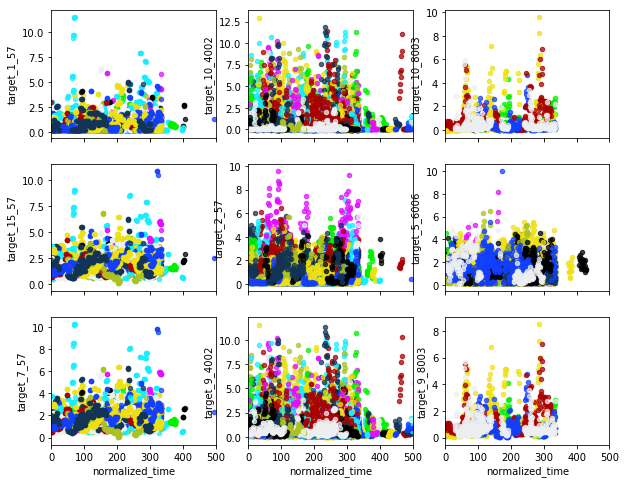

In [177]:
groups=df4.groupby(['chunkID','month_most_common'])

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(figsize=(10,8),nrows=3, ncols=3, sharex=True, sharey=False )
plt.xlim(0, 500)
for k, v in groups:
    v.plot(x='normalized_time', y='target_1_57',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax1, legend=False)
    v.plot(x='normalized_time', y='target_10_4002',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax2, legend=False)
    v.plot(x='normalized_time', y='target_10_8003',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax3, legend=False)
    v.plot(x='normalized_time', y='target_15_57',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax4, legend=False)
    v.plot(x='normalized_time', y='target_2_57',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax5, legend=False)
    v.plot(x='normalized_time', y='target_5_6006',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax6, legend=False)
    v.plot(x='normalized_time', y='target_7_57',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax7, legend=False)
    v.plot(x='normalized_time', y='target_9_4002',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax8, legend=False)
    v.plot(x='normalized_time', y='target_9_8003',kind ='scatter',c=colors[k[1]],label=k, alpha=.75, ax=ax9, legend=False)
print('Miscellaneous Targets')   

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_1_57


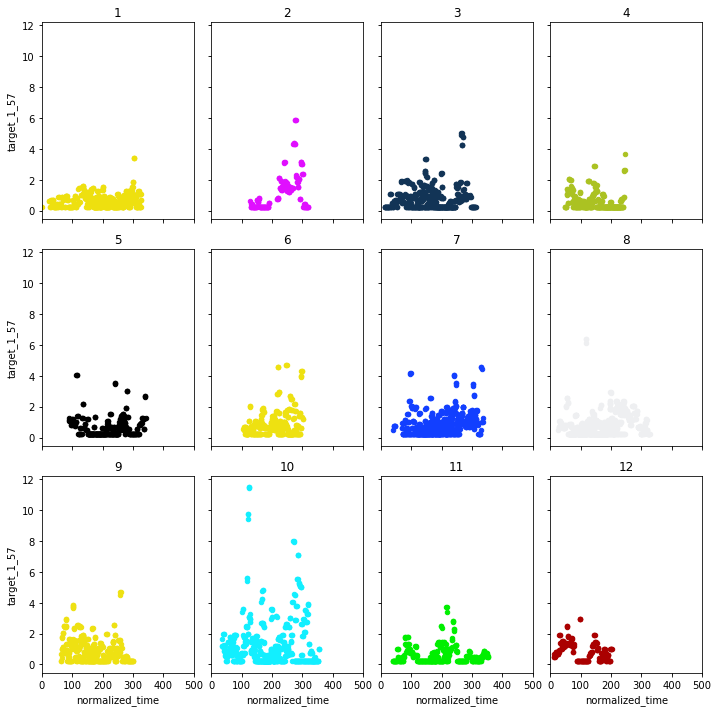

In [290]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_1_57', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_1_57')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_10_4002


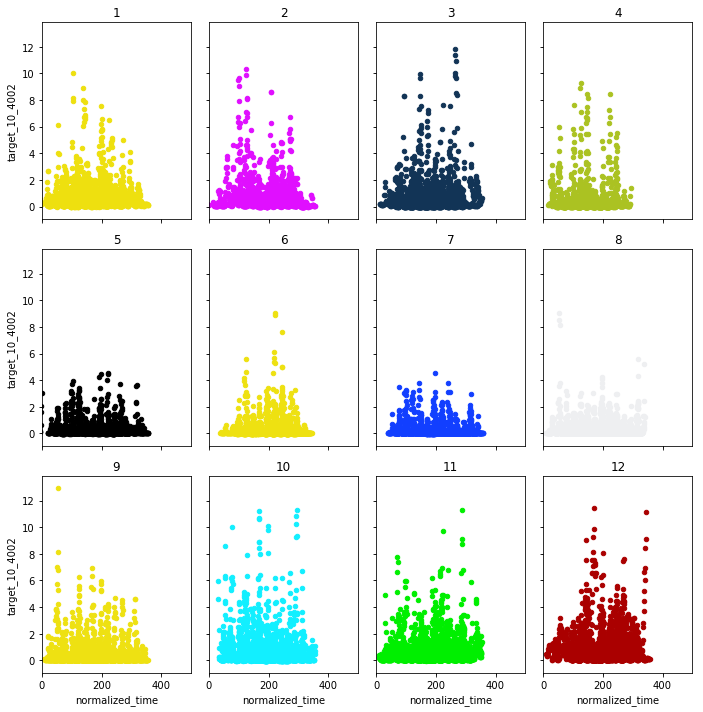

In [291]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_10_4002', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_10_4002')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_10_8003


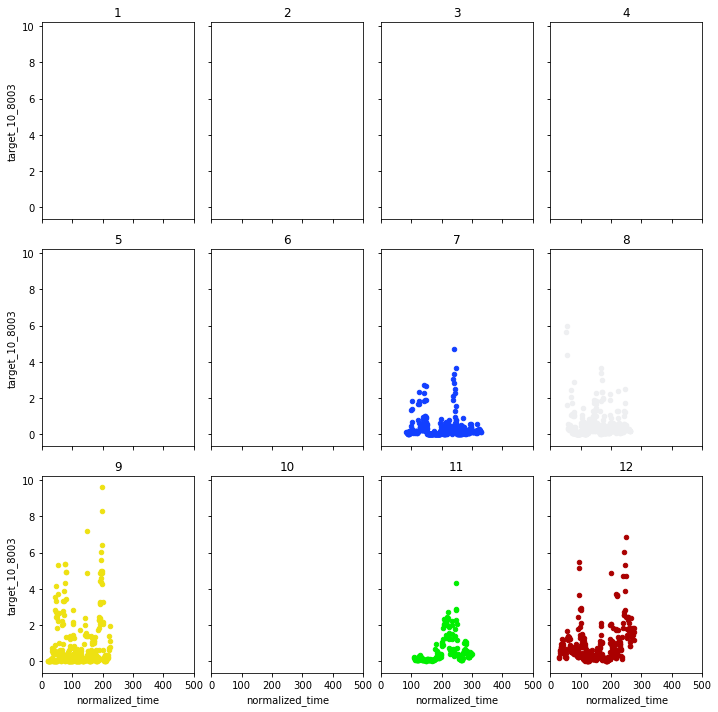

In [292]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_10_8003', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_10_8003')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_15_57


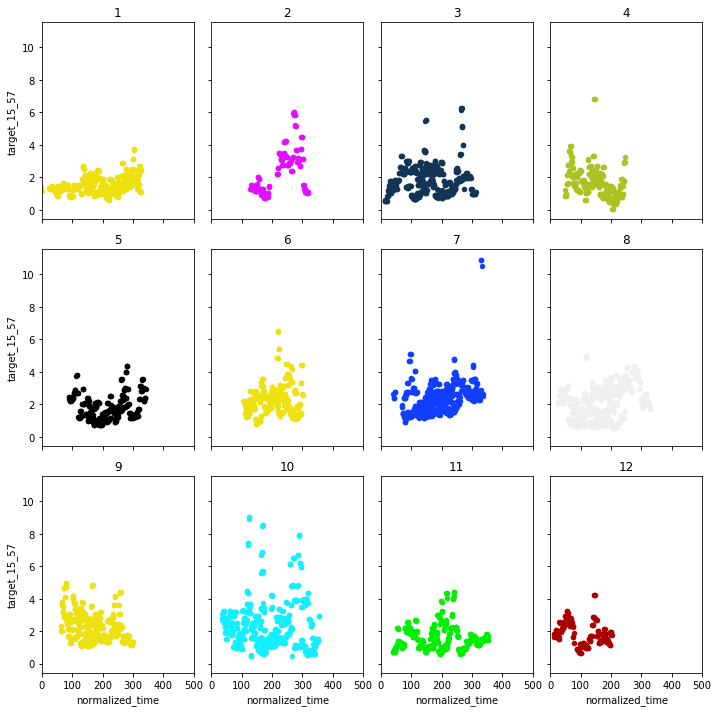

In [293]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_15_57', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_15_57')    
plt.tight_layout()

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


target_2_57


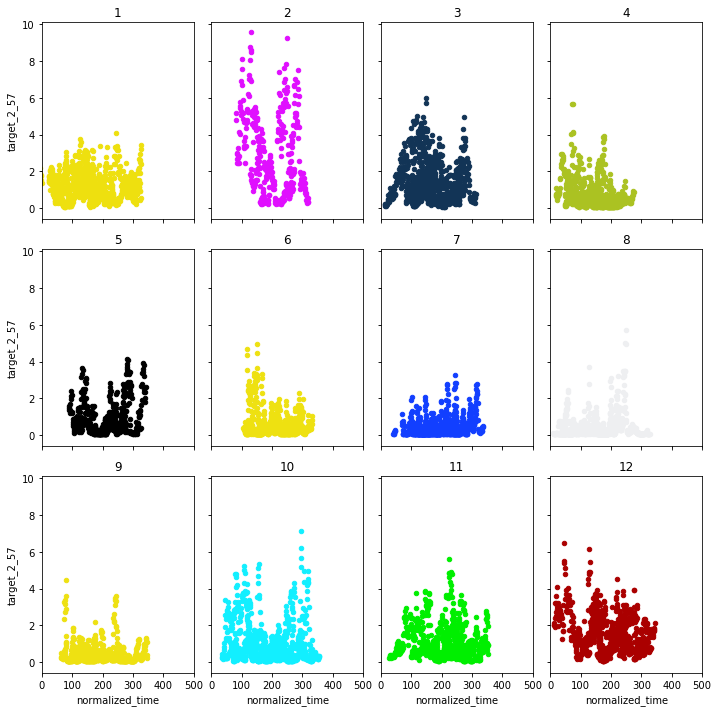

In [294]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_2_57', c=colors[k],kind ='scatter',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_2_57')    
plt.tight_layout()

target_5_6006


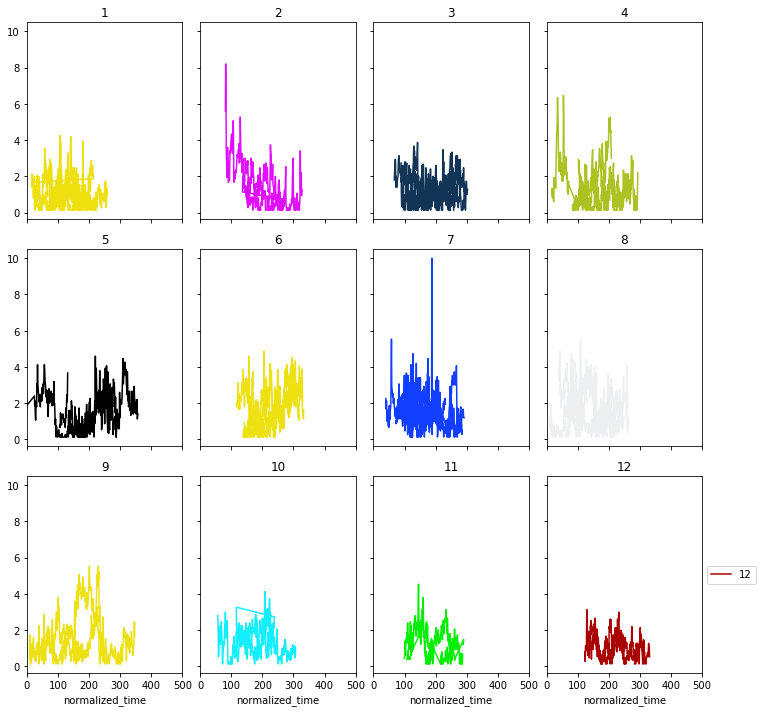

In [7]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_5_6006', c=colors[k],kind ='line',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_5_6006')    
plt.tight_layout()

target_7_57


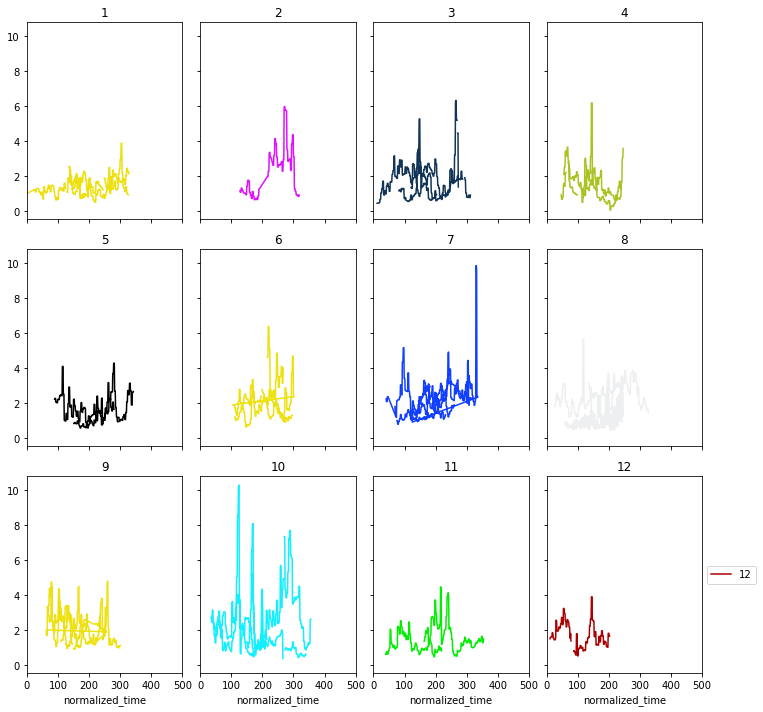

In [6]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_7_57', c=colors[k],kind ='line',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_7_57')    
plt.tight_layout()

target_9_4002


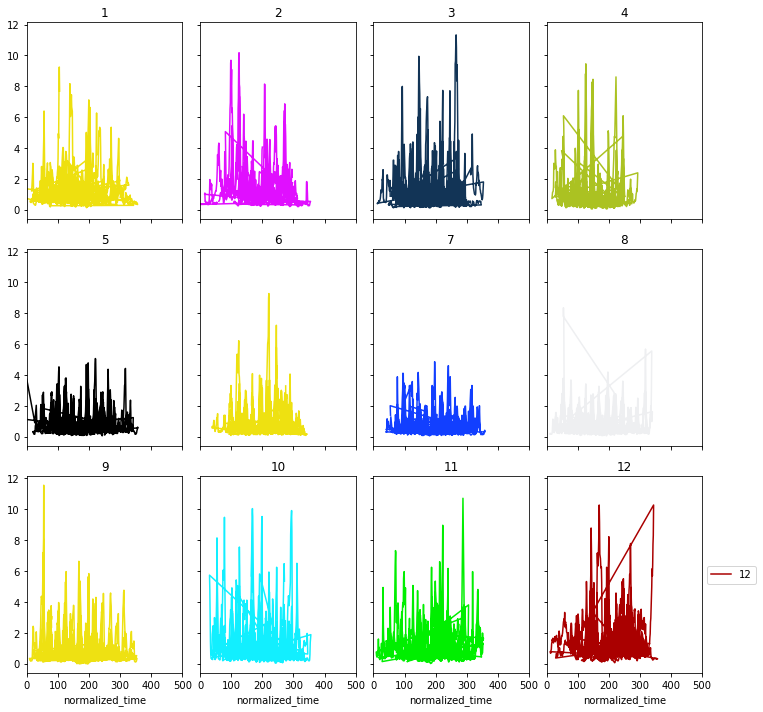

In [5]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_9_4002', c=colors[k],kind ='line',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_9_4002')    
plt.tight_layout()

target_9_8003


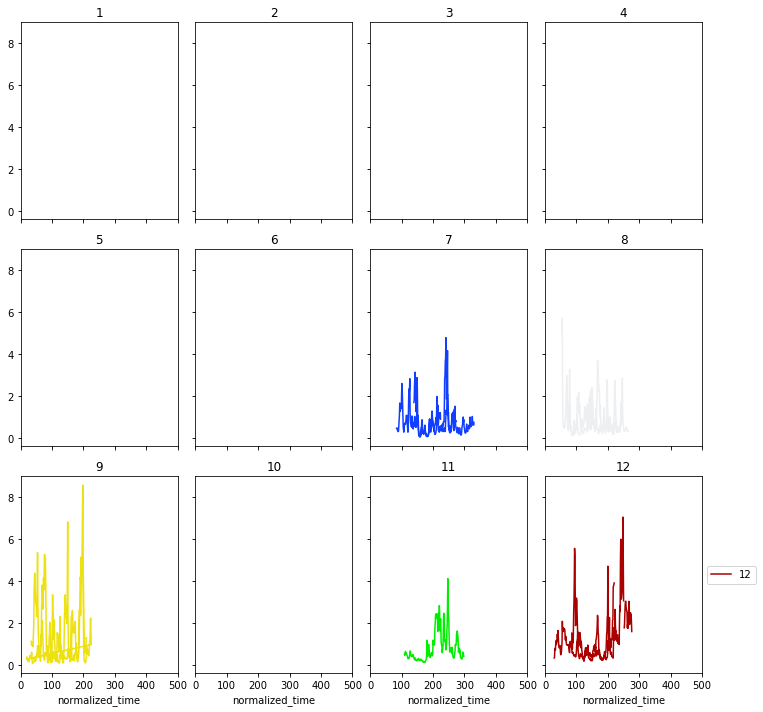

In [8]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 
colors = {1:'#eee00f', 2:'#e00fff', 3:'#123456', 4:'#abc222', 5:'#000000', 6:'#eee111', 7:'#123fff', 8:'#eeeff1',9:'#eee112',10:'#12efff',11:'#00ef00',12:'#aa0000',}
for k, v in df4.groupby(['month_most_common']):
    ax = axes_list.pop(0)
    v.plot(x='normalized_time', y='target_9_8003', c=colors[k],kind ='line',label=k, ax=ax, legend=False)
    plt.xlim(0, 500)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
print('target_9_8003')    
plt.tight_layout()